In [1]:
import os
print(os.getcwd());os.chdir('../')
print(os.getcwd())

[1] "/data01/ch6845/MarcoPolo/experiments"

[1] "/data01/ch6845/MarcoPolo"

In [2]:
library(Matrix)
library(Seurat)
library(mclust)
#library(clustree)
#citation("mclust")
#library

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



In [3]:
read_in_seurat <-function(save_name,method){
    exp_data=readMM(sprintf("datasets/extract/%s.data.counts.mm",save_name))
 
    exp_data_row=read.table(sprintf('datasets/extract/%s.data.row',save_name))$V1
    exp_data_col=read.table(sprintf('datasets/extract/%s.data.col',save_name))$V1    
    rownames(exp_data)=exp_data_row
    colnames(exp_data)=exp_data_col    

    metadatarow=read.table(sprintf('datasets/extract/%s.metadatarow.tsv',save_name),sep='\t')
    metadatacol=read.table(sprintf('datasets/extract/%s.metadatacol.tsv',save_name),sep='\t')  
    
    metadatacol['size_factor']=read.table(sprintf('datasets/extract/%s.size_factor.tsv',save_name),sep='\t')$V1

    seurat <- CreateSeuratObject(counts = exp_data, project = "scRNAseq", assay = "RNA",
                                         min.cells = 0, min.features = 0,
                                         meta.data = as.data.frame(metadatacol))    
    
    for(col in colnames(metadatarow)){
        #print(col)
        #print(head(metadatarow[rownames(seurat[['RNA']]@meta.features),][col]))
        seurat[['RNA']]@meta.features[col]=metadatarow[rownames(seurat[['RNA']]@meta.features),][col]
    }
    seurat
}

In [4]:
#save_name='HumanLiver_filtered'
#dataset_name='Kohinbulk_filtered'
#save_name='Zhengmix8eq_filtered'
#save_name='Trapnell_filtered'
#save_name='E0771_filtered'

In [5]:
if(FALSE){
    if(grepl('Pancreas',save_name)){
        seurat=readRDS('datasets/pancreas/pancreas_seurat.rds')
    }else{
        seurat=read_in_seurat(save_name)
    }    
}


In [6]:
#DimPlot(seurat,group.by='celltype')

In [7]:
#markerrho=read.table(sprintf('datasets/extract/%s.markerrho.tsv',save_name),sep='\t',header=1,row.names='X') 
#markerrho
#colnames(markerrho)
#read.table(sprintf('datasets/extract/%s.data.row',save_name))$V1
#markerrho=read.table(sprintf('datasets/extract/%s.MarcoPolo.2.rank.tsv',save_name),sep='\t',header=1,row.names='X') 

In [8]:
FindMarcoPoloFeatures<-function(object, selection.method, path, nMarcoPolo=100, nfeatures=2000){
    
    markerrho=read.table(sprintf('%s.MarcoPolo.2.rank.tsv',path),sep='\t',header=1,row.names='X')
    
    #path2=sub('_tech','',path)
    #path2=sub('_donor','',path2)
    markerrho_name=read.table(sprintf('%s.data.row',path))$V
    MarcoPolo_top=markerrho_name[as.numeric(rownames(markerrho[order(markerrho['MarcoPolo_rank']),]))+1]
    
    
        
    object_temp=FindVariableFeatures(object, selection.method = selection.method, nfeatures = nfeatures)
    features=VariableFeatures(object = object_temp)
    
    
    if(nfeatures<2*nMarcoPolo){
        stop("'nfeatures' twice as many as 'nMarcoPolo' is recommended")
    }
    
    feature_concat=unique(c(as.character(MarcoPolo_top)[1:nMarcoPolo],features))[1:nfeatures]

    feature_concat

}

#FindMarcoPoloFeatures(seurat,selection.method='vst',path=sprintf('datasets/extract/%s',save_name),nMarcoPolo = 100)

In [9]:
FindHTFeatures<-function(object, selection.method, path, nMarcoPolo=100, nfeatures=2000){
    
    markerrho=read.table(sprintf('%s.hvg.ht.pca.tsv',path),sep='\t')#,header=1,row.names='X')
    
    #path2=sub('_tech','',path)
    #path2=sub('_donor','',path2)
    #markerrho_name=read.table(sprintf('%s.data.row',path))$V
    #MarcoPolo_top=markerrho_name[as.numeric(rownames(markerrho[order(markerrho['MarcoPolo_rank']),]))+1]
    MarcoPolo_top=rownames(markerrho)
    
    
        
    object_temp=FindVariableFeatures(object, selection.method = selection.method, nfeatures = nfeatures)
    features=VariableFeatures(object = object_temp)
    
    
    if(nfeatures<2*nMarcoPolo){
        stop("'nfeatures' twice as many as 'nMarcoPolo' is recommended")
    }
    
    feature_concat=unique(c(as.character(MarcoPolo_top)[1:nMarcoPolo],features))[1:nfeatures]

    feature_concat

}

#FindMarcoPoloFeatures(seurat,selection.method='vst',path=sprintf('datasets/extract/%s',save_name),nMarcoPolo = 100)

In [10]:
#FindHTFeatures(seurat_hvg,'vst',sprintf('datasets/extract/%s',dataset_name),10,30)

# Pre-processing

In [11]:
unique(c(as.character(c('a','c','e','f')),as.character(c('b','d','f'))))

[1] "a" "c" "e" "f" "b" "d"

In [12]:
PC_cluster=25
PC_2D=25

In [13]:
dataset_name_list=c(
'Kohinbulk_filtered',
'HumanLiver_filtered', 
'Zhengmix8eq_filtered'
)

method_list=c('vst','disp','MarcoPolovst','MarcoPolodisp','htvst','htdisp')
nfeatures_list=c(200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000)
resolution_list=c(0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0)

In [14]:
#'vst' %in% 'vst'
grepl('ht', 'hatvst')

[1] FALSE

In [15]:
dataset_name_list=list(

"TabulaTongue_filtered",
"TabulaTrachea_filtered")

In [16]:
dataset_name_list=list(
'TabulaLung_filtered')

In [17]:
result_0=vector(mode="list", length=length(dataset_name_list)); names(result_0) <- dataset_name_list
for (dataset_name in dataset_name_list){
    print(dataset_name)
    seurat=read_in_seurat(dataset_name)
    
    result_1=vector(mode="list", length=length(nfeatures_list));names(result_1) <- nfeatures_list
    for (nfeatures in nfeatures_list){
        print(nfeatures)
        result_2=vector(mode="list", length=length(method_list));names(result_2) <- method_list
        for (method in method_list){
            print(method)
            if(grepl('MarcoPolo',method)){ 
                nMarcoPolo=nfeatures/2
            }else if(grepl('ht',method)){
                nMarcoPolo=nfeatures/2
            }else{
                nMarcoPolo=0
            }    

            seurat_hvg <- NormalizeData(seurat)
            
            if(grepl('ht', method)){
                VariableFeatures(seurat_hvg) <- FindHTFeatures(object=seurat_hvg, 
                                                                 selection.method = sub('ht','',method),
                                                                 path=sprintf('datasets/extract/%s',dataset_name),
                                                                 nMarcoPolo=nMarcoPolo, 
                                                                 nfeatures = nfeatures)
                print(method)
                print('ht called')
                
            }else{
                VariableFeatures(seurat_hvg) <- FindMarcoPoloFeatures(object=seurat_hvg, 
                                                                 selection.method = sub('MarcoPolo','',method),
                                                                 path=sprintf('datasets/extract/%s',dataset_name),
                                                                 nMarcoPolo=nMarcoPolo, 
                                                                 nfeatures = nfeatures)
            }

            all.genes <- rownames(seurat_hvg)
            seurat_hvg=ScaleData(seurat_hvg,features = all.genes)                                         

            seurat_hvg_pca <- suppressMessages({
                RunPCA(seurat_hvg)
            })

            seurat_hvg_pca <- RunTSNE(seurat_hvg_pca, dims= 1:PC_2D)

            seurat_hvg_pca_label <- suppressMessages({
                FindNeighbors(seurat_hvg_pca, dims = 1:PC_cluster)
            })
            
            seurat_hvg_pca_label_cluster <- suppressMessages({
                    FindClusters(seurat_hvg_pca_label, resolution =resolution_list)
            })            
            result_2[[method]]=seurat_hvg_pca_label_cluster            
        }        
        result_1[[nfeatures]]=result_2
    }
    result_0[[dataset_name]]=result_1
    
    
    
    
    
    
    
    
    
    
    result_summary <- as.character(result_0[[dataset_name]][[nfeatures[1]]][[method[1]]]@meta.data$phenoid)

    
    for (nfeatures in nfeatures_list){
        for (method in method_list){
                                
            columns_old <- rep("", times=length(resolution_list))
            columns_new <- rep("", times=length(resolution_list))
            count=0
            for (resolution in resolution_list){
                count=count+1
                columns_old[count]=sprintf('RNA_snn_res.%s',resolution)
                columns_new[count]=sprintf('%s-%s-%s',nfeatures,method,resolution)
            }                
            print(columns_new)
            result_one=result_0[[dataset_name]][[nfeatures]][[method]]@meta.data[columns_old]

            result_one=as.matrix(result_one)
            colnames(result_one)=columns_new

            result_summary<-cbind(result_summary,result_one)
            
        }
    }
    
    write.table(result_summary,
                file=sprintf('datasets/extract/%s.clusteringrobustness.top%s.tsv',dataset_name,PC_cluster),
                sep='\t',
                row.names=TRUE, 
                col.names=TRUE)     
    
    
    
    
    
    
    
    
    
    
    
}



[1] "TabulaLung_filtered"
[1] 200
[1] "vst"


Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55733

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9201
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55733

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8988
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55733

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8802
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55733

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8656
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 57402

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9276
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 57402

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9122
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 57402

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8969
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 57402

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8822
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 58267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 58267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9055
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 58267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8865
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 58267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8675
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 59215

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 15
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 59215

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9031
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 59215

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8877
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 59215

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9293
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9140
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8987
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8836
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9285
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9126
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8980
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8839
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9251
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9064
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8878
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 56131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8704
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9324
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9020
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8885
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55291

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9276
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55291

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9089
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55291

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8904
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55291

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54591

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9271
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54591

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9123
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54591

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8980
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54591

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8841
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9330
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9183
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9038
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8894
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54618

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9308
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54618

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9151
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54618

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54618

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8863
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9266
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9081
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8900
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 54418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52819

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9317
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52819

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52819

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9033
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52819

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8903
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53075

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9282
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53075

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9098
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53075

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8920
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53075

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8745
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9283
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9138
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8862
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49216

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9366
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49216

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49216

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9087
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49216

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9329
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9183
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9039
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52884

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8920
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9273
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9081
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8890
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8701
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9341
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9200
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9080
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 15
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9066
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8888
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8755
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51719

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9311
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51719

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51719

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9042
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51719

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8914
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9364
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9077
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49548

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9357
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9208
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9084
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51973

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8969
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55217

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9292
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55217

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9105
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55217

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8918
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55217

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50943

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9366
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50943

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50943

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9109
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50943

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8993
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9243
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9057
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8905
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8769
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9331
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9198
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9068
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48879

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9366
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48879

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48879

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9083
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48879

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9365
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9233
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9002
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9288
Number of communities: 16
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8914
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 55352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8731
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9378
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9250
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9131
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9012
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52063

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9248
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52063

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9060
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52063

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8899
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52063

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8762
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9371
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9238
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9007
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9368
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9367
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9126
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9012
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9298
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9110
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8922
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8738
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51367

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9376
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51367

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51367

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9128
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51367

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9012
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9066
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8924
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 52372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8782
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9367
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9120
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9006
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48858

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9376
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48858

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48858

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9096
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48858

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8968
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49878

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9371
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49878

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9248
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49878

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9128
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49878

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9010
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9289
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9096
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8903
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53782

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9382
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9252
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50351

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9021
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51623

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9267
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51623

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9108
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51623

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51623

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49976

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9368
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49976

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49976

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49976

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9002
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9386
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9113
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8982
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9393
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9274
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9036
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53739

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9285
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53739

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9089
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53739

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8907
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53739

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8760
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9380
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9247
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9016
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9284
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9143
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9003
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8866
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50196

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9356
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50196

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50196

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9111
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50196

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8997
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48829

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9369
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48829

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48829

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9080
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48829

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9393
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9274
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9157
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49626

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9041
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9260
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9093
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8941
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8797
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50794

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9373
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50794

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50794

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9126
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50794

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9011
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9284
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9140
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8998
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8857
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49710

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9370
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49710

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49710

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49710

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9015
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9360
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9078
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49904

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9389
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49904

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9268
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49904

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9150
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49904

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9034
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53244

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9283
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53244

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9131
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53244

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8983
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 53244

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8839
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50152

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9387
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50152

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9262
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50152

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9144
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50152

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9029
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9260
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8973
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51285

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8829
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9373
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9253
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9138
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9024
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48674

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9374
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48674

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48674

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9080
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48674

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49501

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9414
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49501

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9293
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49501

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9176
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49501

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9062
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9296
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9151
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9009
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8868
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49846

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9396
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49846

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9271
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49846

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9151
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49846

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9035
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51176

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9283
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51176

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9137
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51176

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8992
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51176

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8848
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9358
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9230
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9114
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49641

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8999
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9386
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9089
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9409
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9289
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9056
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51788

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51788

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9157
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51788

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9015
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51788

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49805

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9399
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49805

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9273
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49805

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9152
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49805

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9038
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9315
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9170
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9024
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49277

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9370
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49277

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49277

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9128
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49277

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9014
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9379
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9084
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8963
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9414
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9294
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9062
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51209

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9317
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51209

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9174
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51209

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9031
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51209

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8890
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9384
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9260
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9142
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9026
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9343
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9199
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9054
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8911
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9369
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9245
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9128
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9013
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9371
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9098
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8981
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49121

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9412
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49121

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9290
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49121

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49121

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9058
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51219

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9326
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51219

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9184
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51219

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9042
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51219

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8901
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49986

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9380
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49986

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49986

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9137
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49986

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9021
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9354
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9209
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9065
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8931
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48691

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9370
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48691

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48691

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48691

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9013
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48554

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9363
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48554

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9215
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48554

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9091
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48554

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8973
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9408
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9286
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9053
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51386

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9356
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51386

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51386

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9071
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51386

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9391
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9268
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9151
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9035
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50360

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9353
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50360

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9208
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50360

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9062
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50360

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49001

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9380
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49001

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49001

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49001

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9019
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9376
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8977
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9412
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9288
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49479

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9052
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51172

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9349
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51172

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9206
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51172

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9064
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51172

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8927
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9403
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9280
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9160
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9044
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9347
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9201
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9063
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 50206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8927
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9379
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48944

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9019
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49567

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9370
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49567

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49567

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49567

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8981
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9395
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9273
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9155
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9040
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51234

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9354
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51234

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9211
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51234

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9067
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51234

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8931
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49663

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9382
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49663

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9258
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49663

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49663

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9026
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9350
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9209
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9074
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8939
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9371
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9125
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9008
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9366
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9231
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9112
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49676

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8993
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49015

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9387
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49015

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9265
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49015

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9147
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49015

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9031
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9355
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9211
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9069
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 51051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9379
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9021
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9363
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9092
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8956
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48551

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9372
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48551

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48551

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48551

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9014
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9358
Number of communities: 18
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9235
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9115
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 49563

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8995
Number of communities: 20
Elapsed time: 0 seconds
Modularity Optimizer

Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9394
Number of communities: 19
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9277
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9161
Number of communities: 21
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1716
Number of edges: 48731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9044
Number of communities: 22
Elapsed time: 0 seconds
Modularity Optimizer

In [ ]:
print(1)

In [15]:
#result_0[[dataset_name_list[1]]][[nfeatures[1]]][[method[1]]]@meta.data$phenoid
sprintf('datasets/extract/%s.clusteringrobustness.tsv',dataset_name)

[1] "datasets/extract/Zhengmix8eq_filtered.clusteringrobustness.tsv"

In [26]:
for (dataset_name in dataset_name_list){
    result_summary <- as.character(result_0[[dataset_name]][[nfeatures[1]]][[method[1]]]@meta.data$phenoid)

    
    for (nfeatures in nfeatures_list){
        for (method in method_list){
                                
            columns_old <- rep("", times=length(resolution_list))
            columns_new <- rep("", times=length(resolution_list))
            count=0
            for (resolution in resolution_list){
                count=count+1
                columns_old[count]=sprintf('RNA_snn_res.%s',resolution)
                columns_new[count]=sprintf('%s-%s-%s',nfeatures,method,resolution)
            }                
            print(columns_new)
            result_one=result_0[[dataset_name]][[nfeatures]][[method]]@meta.data[columns_old]

            result_one=as.matrix(result_one)
            colnames(result_one)=columns_new

            result_summary<-cbind(result_summary,result_one)
            
        }
    }
    
    write.table(result_summary,
                file=sprintf('datasets/extract/%s.clusteringrobustness.tsv',dataset_name),
                sep='\t',
                row.names=TRUE, 
                col.names=TRUE) 
    
}

[1] "200-vst-0.6" "200-vst-0.8" "200-vst-1"   "200-vst-1.2" "200-vst-1.4"
[6] "200-vst-1.6" "200-vst-1.8" "200-vst-2"  
[1] "200-disp-0.6" "200-disp-0.8" "200-disp-1"   "200-disp-1.2" "200-disp-1.4"
[6] "200-disp-1.6" "200-disp-1.8" "200-disp-2"  
[1] "200-MarcoPolovst-0.6" "200-MarcoPolovst-0.8" "200-MarcoPolovst-1"  
[4] "200-MarcoPolovst-1.2" "200-MarcoPolovst-1.4" "200-MarcoPolovst-1.6"
[7] "200-MarcoPolovst-1.8" "200-MarcoPolovst-2"  
[1] "200-MarcoPolodisp-0.6" "200-MarcoPolodisp-0.8" "200-MarcoPolodisp-1"  
[4] "200-MarcoPolodisp-1.2" "200-MarcoPolodisp-1.4" "200-MarcoPolodisp-1.6"
[7] "200-MarcoPolodisp-1.8" "200-MarcoPolodisp-2"  
[1] "200-htvst-0.6" "200-htvst-0.8" "200-htvst-1"   "200-htvst-1.2"
[5] "200-htvst-1.4" "200-htvst-1.6" "200-htvst-1.8" "200-htvst-2"  
[1] "200-htdisp-0.6" "200-htdisp-0.8" "200-htdisp-1"   "200-htdisp-1.2"
[5] "200-htdisp-1.4" "200-htdisp-1.6" "200-htdisp-1.8" "200-htdisp-2"  
[1] "300-vst-0.6" "300-vst-0.8" "300-vst-1"   "300-vst-1.2" "300-vst-1.4

In [23]:
dataset_name_list

[1] "HumanLiver_filtered"

In [31]:
result_summary

result_summary 200.vst.0.6 200.vst.0.8 200.vst.1 200.vst.1.2
SRR3952323 hESC           4           4           4         4          
SRR3952325 hESC           4           4           4         4          
SRR3952326 hESC           4           4           4         4          
SRR3952327 hESC           4           4           4         4          
SRR3952328 hESC           4           4           4         4          
SRR3952329 hESC           4           4           4         4          
SRR3952330 hESC           4           4           4         4          
SRR3952331 hESC           4           4           4         4          
SRR3952337 hESC           4           4           4         4          
SRR3952341 hESC           4           4           4         4          
SRR3952342 hESC           4           4           4         4          
SRR3952343 hESC           4           4           4         4          
SRR3952344 hESC           4           4           4         4          
SRR3952345 hESC           4           4           4         4          
SRR3952347 hESC           4           4           4         4          
SRR3952348 hESC           4           4           4         4          
SRR3952349 hESC           4           4           4         4          
SRR3952350 hESC           4           4           4         4          
SRR3952351 hESC           4           4           4         4          
SRR3952352 hESC           4           4           4         4          
SRR3952354 hESC           4           4           4         4          
SRR3952355 hESC           4           4           4         4          
SRR3952356 hESC           4           4           4         4          
SRR3952357 hESC           4           4           4         4          
SRR3952358 hESC           4           4           4         4          
SRR3952360 hESC           4           4           4         4          
SRR3952361 hESC           4           4           4         4          
SRR3952362 hESC           4           4           4         4          
SRR3952363 hESC           4           4           4         4          
SRR3952365 hESC           4           4           4         4          
⋮          ⋮              ⋮           ⋮           ⋮         ⋮          
SRR3952803 D2LtM          0           0           5         5          
SRR3952804 D2LtM          0           0           5         5          
SRR3952805 D2LtM          0           0           5         5          
SRR3952806 D2LtM          0           0           5         5          
SRR3952807 D2LtM          0           0           5         5          
SRR3952808 D2LtM          0           0           5         5          
SRR3952809 D2LtM          0           0           5         5          
SRR3952810 D2LtM          0           0           5         5          
SRR3952811 D2LtM          0           0           5         5          
SRR3952812 D2LtM          0           0           5         5          
SRR3952813 D2LtM          0           0           5         5          
SRR3952814 D2LtM          0           0           5         5          
SRR3952815 D2LtM          0           0           5         5          
SRR3952816 D2LtM          0           0           5         5          
SRR3952817 D2LtM          0           0           5         5          
SRR3952818 D2LtM          0           0           5         5          
SRR3952819 D2LtM          0           0           5         5          
SRR3952820 D2LtM          0           0           5         5          
SRR3952821 D2LtM          0           0           5         5          
SRR3952822 D2LtM          0           0           5         5          
SRR3952823 D2LtM          0           0           5         5          
SRR3952824 D2LtM          0           0           5         5          
SRR3952825 D2LtM          0           0           5         5          
SRR3952826 D2LtM          0           0           5

In [18]:
#result_0[[dataset_name]][[nfeatures]][[method]]@meta.data[empty_vec]

In [19]:
#result_0[['HumanLiver_filtered']][[200]][['vst']]@meta.data

In [17]:
#result_0[['HumanLiver_filtered']][[1000]][['vst']]@meta.data
toview=result_0[['Zhengmix4uneq_filtered']][[400]][['vst']]

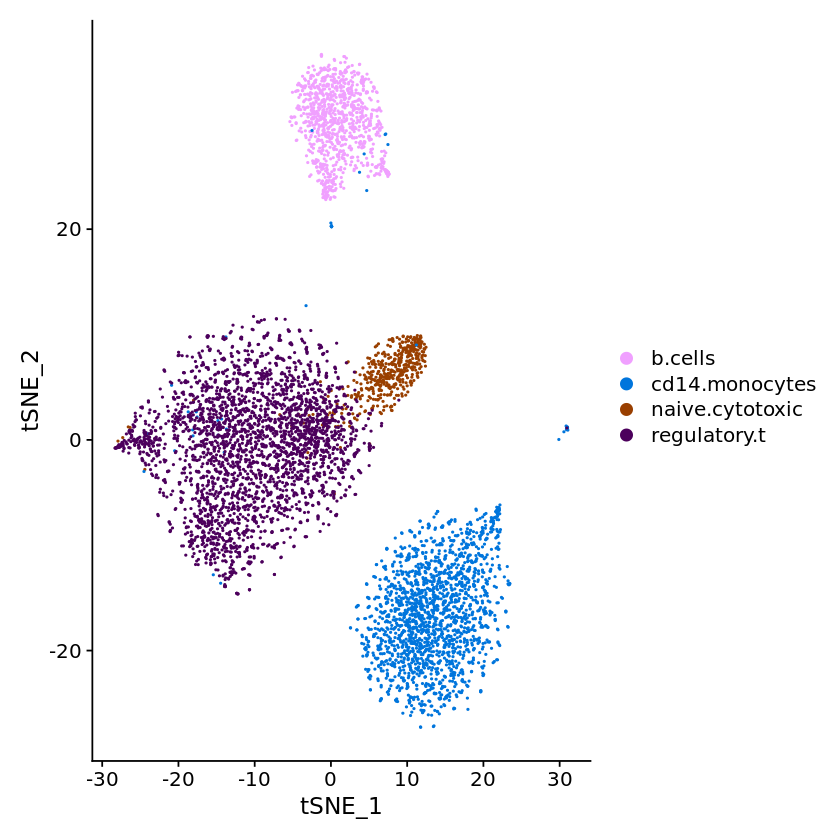

In [34]:
DimPlot(toview,group.by='phenoid',cols = DiscretePalette(22))

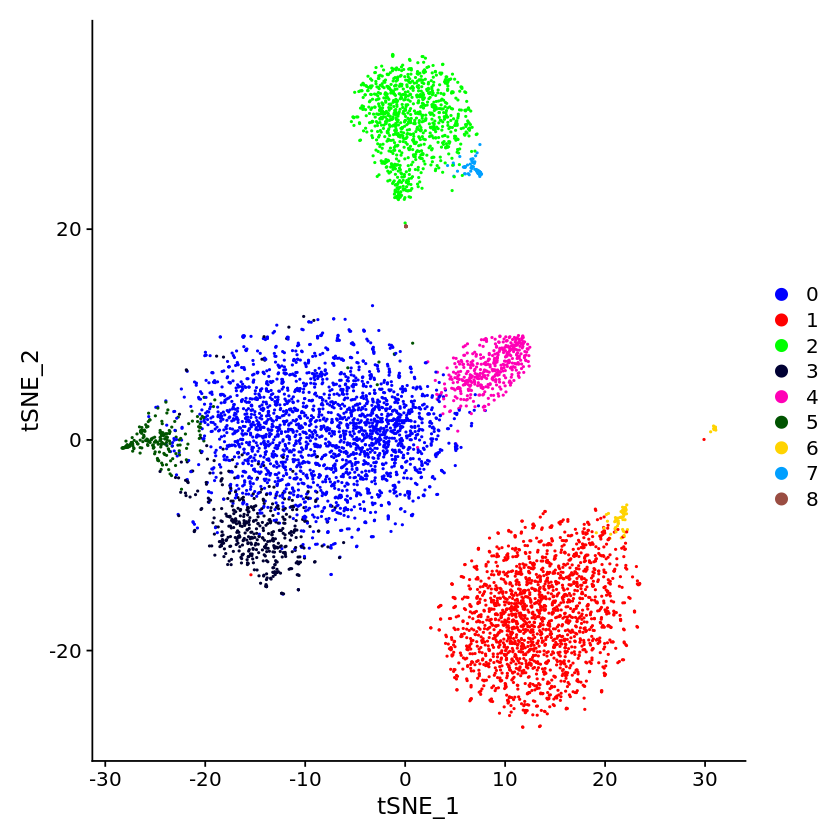

In [35]:
DimPlot(toview,group.by='RNA_snn_res.0.6',cols = DiscretePalette(27))

In [22]:
toview@meta.data

orig.ident nCount_RNA nFeature_RNA dataset barcode         
b.cells1147       scRNAseq   1054       387          1       ACGGAGGACCGAAT-1
b.cells6276       scRNAseq    831       314          1       GCAGCGTGCCGAAT-1
b.cells6144       scRNAseq   1519       532          1       GATTTAGAGTGTAC-1
b.cells6285       scRNAseq    692       360          1       GCAGCTCTAGAACA-1
b.cells8679       scRNAseq    995       377          1       TCAGTGGAGTTCAG-1
b.cells6455       scRNAseq    995       417          1       GCCTCATGCGGGAA-1
b.cells96         scRNAseq   1542       516          1       AAATCATGACTGGT-1
b.cells2344       scRNAseq   1062       392          1       ATACGGACTTAGGC-1
b.cells6713       scRNAseq    884       358          1       GGACAACTCTTACT-1
b.cells5182       scRNAseq   1165       421          1       CTGAGAACCGCCTT-1
b.cells6988       scRNAseq   1168       455          1       GGCGGACTAAGTAG-1
b.cells5491       scRNAseq    703       315          1       GAACTGTGACCACA-1
b.cells2848       scRNAseq   1289       404          1       ATTACCACTTTGGG-1
b.cells9301       scRNAseq    824       311          1       TGCCAGCTCACTAG-1
b.cells2944       scRNAseq   2242       770          1       ATTGAAACCGACAT-1
b.cells8432       scRNAseq   2421       748          1       TATCTCGACGCCTT-1
b.cells2882       scRNAseq   1175       391          1       ATTCAAGAGTGCTA-1
b.cells2687       scRNAseq   2142       629          1       ATGAGCACTTTACC-1
b.cells1880       scRNAseq    474       195          1       AGGACACTTGCAAC-1
b.cells2338       scRNAseq   1081       406          1       ATACGGACAGCTAC-1
b.cells3187       scRNAseq    678       294          1       CAAGTTCTTTCACT-1
b.cells3047       scRNAseq   1125       458          1       ATTTCTCTATCTCT-1
b.cells1601       scRNAseq   1364       527          1       AGATATACCCACCT-1
b.cells403        scRNAseq    924       376          1       AAGATTACGACGAG-1
b.cells2202       scRNAseq   2059       659          1       AGTTATGATTGCAG-1
b.cells8155       scRNAseq    913       356          1       TAGATTGACCTCAC-1
b.cells5288       scRNAseq   1846       540          1       CTTACAACACCAAC-1
b.cells9200       scRNAseq   1287       440          1       TGATATGATTGGTG-1
b.cells8361       scRNAseq   1529       504          1       TATACAGATCGACA-1
b.cells461        scRNAseq    942       360          1       AAGGTCTGGGACAG-1
⋮                 ⋮          ⋮          ⋮            ⋮       ⋮               
regulatory.t3185  scRNAseq   1117        579         1       CAATAATGTTCCAT-1
regulatory.t10165 scRNAseq   1223        467         1       TTGGTACTTGTTTC-1
regulatory.t4848  scRNAseq   1129        470         1       CGTAACGAGGTTCA-1
regulatory.t5872  scRNAseq    973        420         1       GACGCCGAGATGAA-1
regulatory.t1491  scRNAseq   2207        739         1       AGAAAGTGCTGGTA-1
regulatory.t502   scRNAseq    758        378         1       AAGTAGGACACACA-1
regulatory.t5725  scRNAseq   1211        526         1       GAATGCACAACGGG-1
regulatory.t8470  scRNAseq    766        366         1       TAGGTCGAAACCTG-1
regulatory.t8939  scRNAseq    869        362         1       TCCACGTGTGACAC-1
regulatory.t2853  scRNAseq   1459        612         1       ATTACCTGAGATCC-1
regulatory.t62    scRNAseq   1855        585         1       AAAGAGACCAATCG-1
regulatory.t3588  scRNAseq   1352        553         1       CAGGTTGAGCGAAG-1
regulatory.t9025  scRNAseq   1090        416         1       TCCTAAACGGCAAG-1
regulatory.t2045  scRNAseq   4576       1434         1       AGGTTCGATGTGCA-1
regulatory.t5407  scRNAseq   1085        518         1       CTGGCACTTGACAC-1
regulatory.t4334  scRNAseq    901        399         1       CCTAGAGATCTCTA-1
regulatory.t5013  scRNAseq   1166        514         1       CTAATGCTGACGAG-1
regulatory.t2769  scRNAseq   1562        639         1       ATGCGCCTGACGTT-1
regulatory.t3569  scRNAseq    973        460         1       CAGGGCACTCGCTC-1
regulatory.t2706  scRNAseq   1886       

In [29]:
dataset_name_list=c( 
'Zhengmix8eq_filtered'
)

#method_list=c('MarcoPolovst','MarcoPolomvp','MarcoPolodisp')
#nfeatures_list=c(500,1000,1500,2000)
#resolution_list=c(0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0)

method_list=c('MarcoPolodisp')
nfeatures_list=c(2000)
resolution_list=c(0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0)

In [30]:
result_0=vector(mode="list", length=length(dataset_name_list)); names(result_0) <- dataset_name_list
for (dataset_name in dataset_name_list){
    print(dataset_name)
    seurat=read_in_seurat(dataset_name)
    
    result_1=vector(mode="list", length=length(nfeatures_list));names(result_1) <- nfeatures_list
    for (nfeatures in nfeatures_list){
        print(nfeatures)
        result_2=vector(mode="list", length=length(method_list));names(result_2) <- method_list
        for (method in method_list){
            print(method)
            if(grepl('MarcoPolo',method)){ 
                nMarcoPolo=nfeatures/2
            }else{
                nMarcoPolo=0
            }        

            seurat_hvg <- NormalizeData(seurat)
            VariableFeatures(seurat_hvg) <- FindMarcoPoloFeatures(object=seurat_hvg, 
                                                                 selection.method = sub('MarcoPolo','',method),
                                                                 path=sprintf('datasets/extract/%s',dataset_name),
                                                                 nMarcoPolo=nMarcoPolo, 
                                                                 nfeatures = nfeatures)              

            all.genes <- rownames(seurat_hvg)
            seurat_hvg=ScaleData(seurat_hvg,features = all.genes)                                         

            seurat_hvg_pca <- suppressMessages({
                RunPCA(seurat_hvg)
            })

            seurat_hvg_pca <- RunTSNE(seurat_hvg_pca, dims= 1:PC_2D)

            seurat_hvg_pca_label <- suppressMessages({
                FindNeighbors(seurat_hvg_pca, dims = 1:PC_cluster)
            })
            
            seurat_hvg_pca_label_cluster <- suppressMessages({
                    FindClusters(seurat_hvg_pca_label, resolution =resolution_list)
            })            
            result_2[[method]]=seurat_hvg_pca_label_cluster            
        }        
        result_1[[nfeatures]]=result_2
    }
    result_0[[dataset_name]]=result_1
}



[1] "Zhengmix8eq_filtered"
[1] 2000
[1] "MarcoPolodisp"


Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 289163

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8730
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 289163

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8395
Number of communities: 9
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 289163

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 9
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 289163

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7772
Number of communities: 9
Elapsed time: 0 seconds
Modularity Optimizer

In [ ]:
DimPlot(result[[1000]][['MarcoPolovst']],group.by='celltype',cols = DiscretePalette(15))#+ NoLegend()

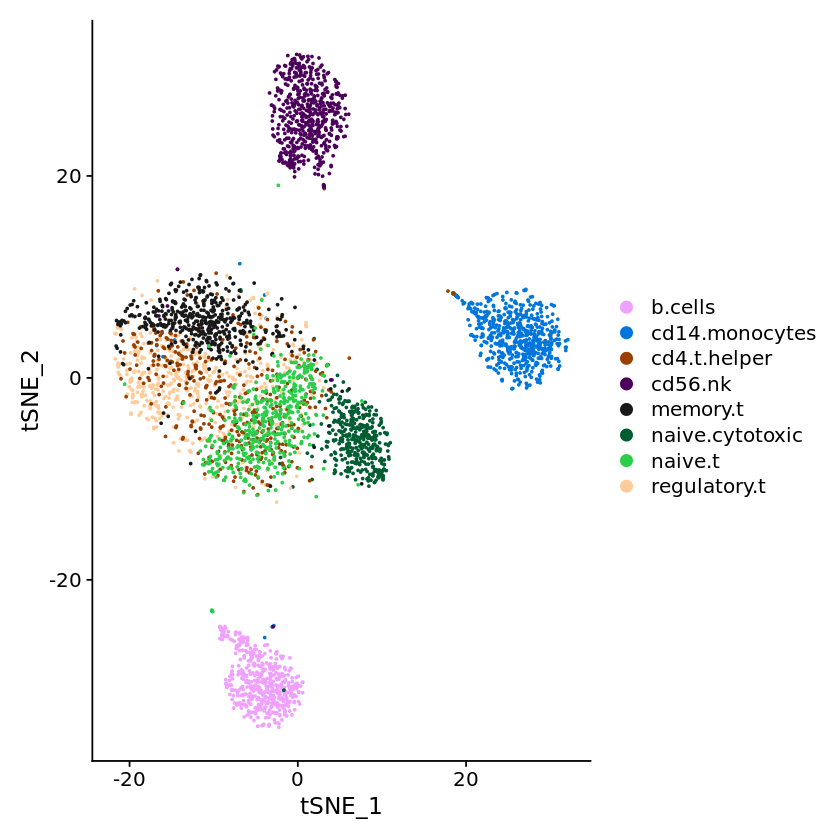

In [34]:
#result_0[['HumanLiver_filtered']][[1000]][['vst']]@meta.data
toview=result_0[['Zhengmix8eq_filtered']][[2000]][['MarcoPolovst']]
DimPlot(toview,group.by='phenoid',cols = DiscretePalette(22))

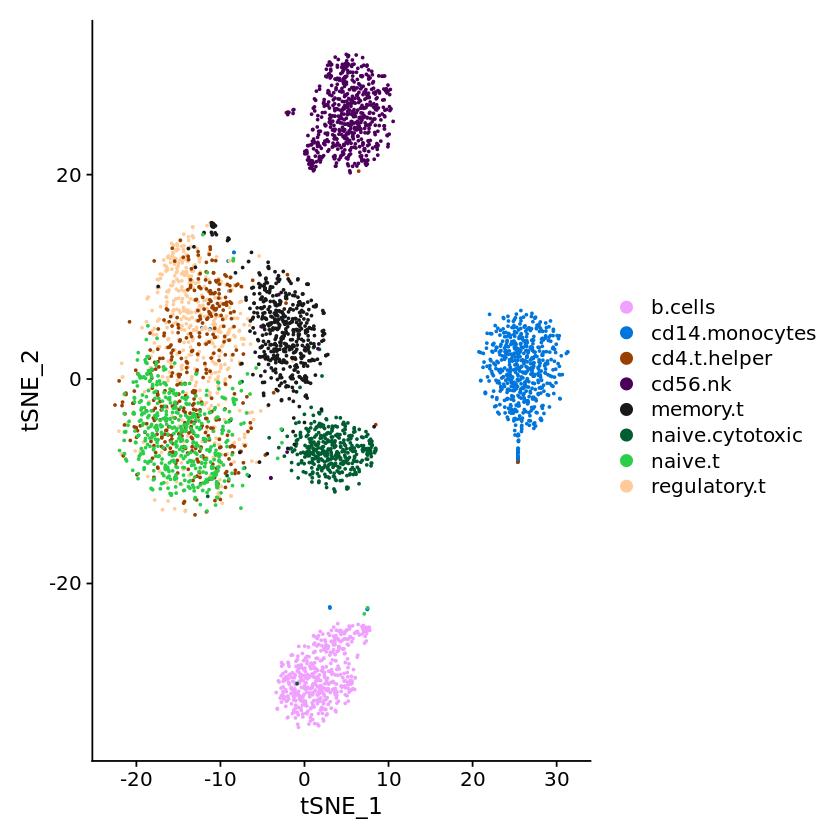

In [32]:
#result_0[['HumanLiver_filtered']][[1000]][['vst']]@meta.data
toview=result_0[['Zhengmix8eq_filtered']][[2000]][['MarcoPolodisp']]
DimPlot(toview,group.by='phenoid',cols = DiscretePalette(22))

In [33]:
write.table(Embeddings(toview[['tsne']]),
        file=sprintf('datasets/extract/%s.tsne.MarcoPolodisp.2000.tsv','Zhengmix8eq'),
        sep='\t',
        row.names=TRUE, 
        col.names=TRUE) 

In [35]:
dataset_list=c(
'Kohinbulk_filtered',
'HumanLiver_filtered',
'Zhengmix4eq_filtered',
'Zhengmix4uneq_filtered',   
'Zhengmix8eq_filtered',
)
method_list=c('vst','mvp','disp','MarcoPolovst','MarcoPolomvp','MarcoPolodisp')
nfeatures_list=c(2000)
resolution_list=c(0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0)

result=vector(mode="list", length=length(nfeatures_list));names(result) <- nfeatures_list

for (nfeatures in nfeatures_list){
    result_row=vector(mode="list", length=length(method_list));names(result_row) <- method_list
    
    for (method in method_list){
        if(grepl('MarcoPolo',method)){ 
            nMarcoPolo=nfeatures/2
        }else{
            nMarcoPolo=0
        }
        
        if(grepl('Pancreas',save_name)){
            seurat_list <- SplitObject(seurat, split.by = "tech")
            #seurat_list <- SplitObject(seurat, split.by = sub('Pancreas_filtered_','',save_name))
            for (i in 1:length(seurat_list)) {
                seurat_list[[i]] <- NormalizeData(seurat_list[[i]], verbose = FALSE)
                VariableFeatures(seurat_list[[i]]) <- FindMarcoPoloFeatures(object=seurat_list[[i]], 
                                                                             selection.method = sub('MarcoPolo','',method),
                                                                             path=sprintf('datasets/extract/%s',save_name),
                                                                             nMarcoPolo=nMarcoPolo, 
                                                                             nfeatures = nfeatures)
                }
            seurat_anchors <- FindIntegrationAnchors(object.list = seurat_list, dims = 1:30)
            seurat_hvg <- IntegrateData(anchorset = seurat_anchors, dims = 1:30)                          
            
        }else{
            seurat_hvg <- NormalizeData(seurat)
            VariableFeatures(seurat_hvg) <- FindMarcoPoloFeatures(object=seurat_hvg, 
                                                                 selection.method = sub('MarcoPolo','',method),
                                                                 path=sprintf('datasets/extract/%s',save_name),
                                                                 nMarcoPolo=nMarcoPolo, 
                                                                 nfeatures = nfeatures)   
        }
        
        all.genes <- rownames(seurat_hvg)
        seurat_hvg=ScaleData(seurat_hvg,features = all.genes)                                         
                                                 
        seurat_hvg_pca <- suppressMessages({
            RunPCA(seurat_hvg)
        })
        
        seurat_hvg_pca <- RunTSNE(seurat_hvg_pca, dims= 1:PC_2D)
     
        seurat_hvg_pca_label <- suppressMessages({
            FindNeighbors(seurat_hvg_pca, dims = 1:PC_cluster)
        })
        
        for (resolution in resolution_list){
            seurat_hvg_pca_label_cluster <- suppressMessages({
                FindClusters(seurat_hvg_pca_label, resolution =resolution)
            })
            nclusters=length(sort(unique(seurat_hvg_pca_label_cluster@meta.data$seurat_clusters)))
            ari=adjustedRandIndex(seurat@meta.data$phenoid, seurat_hvg_pca_label_cluster@meta.data$seurat_clusters)
            cat(method,nfeatures,resolution,nclusters,ari)
            if (nclusters >= ceiling(length(unique(seurat@meta.data$phenoid))/5)*5){
                if(FALSE){
                    start_time <- Sys.time() 
                        for(i in 1:5){
                            seurat_hvg_pca <- suppressMessages({
                                RunPCA(seurat, features = features)
                            })                        
                        }
                    end_time <- Sys.time()

                    elapsed_time=end_time - start_time                    
                }

                break
            }
        }
        result_row[[method]]=seurat_hvg_pca_label_cluster
    }
    result[[nfeatures]]=result_row
}        

     

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6169 anchors

Filtering anchors

	Retained 4658 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 203789

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8928
Number of communities: 15
Elapsed time: 0 seconds
vst 2000 0.6 15 0.1097061

Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 202532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 14
Elapsed time: 0 seconds
mvp 2000 0.6 14 0.1273295Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 202532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8739
Number of communities: 15
Elapsed time: 0 seconds
mvp 2000 0.8 15 0.1242347

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6146 anchors

Filtering anchors

	Retained 4455 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 184032

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9083
Number of communities: 18
Elapsed time: 0 seconds
disp 2000 0.6 18 0.1366234

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6331 anchors

Filtering anchors

	Retained 4512 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 202755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 13
Elapsed time: 0 seconds
MarcoPolovst 2000 0.6 13 0.1305257Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 202755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8736
Number of communities: 16
Elapsed time: 0 seconds
MarcoPolovst 2000 0.8 16 0.1022685

Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 202214

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 16
Elapsed time: 0 seconds
MarcoPolomvp 2000 0.6 16 0.111625

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6285 anchors

Filtering anchors

	Retained 4234 anchors

Extracting within-dataset neighbors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”
Centering and scaling data matrix



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4679
Number of edges: 201445

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9143
Number of communities: 17
Elapsed time: 0 seconds
MarcoPolodisp 2000 0.6 17 0.1461651

In [ ]:
DimPlot(result[[4000]][['mvp']],group.by='celltype',cols = DiscretePalette(15))

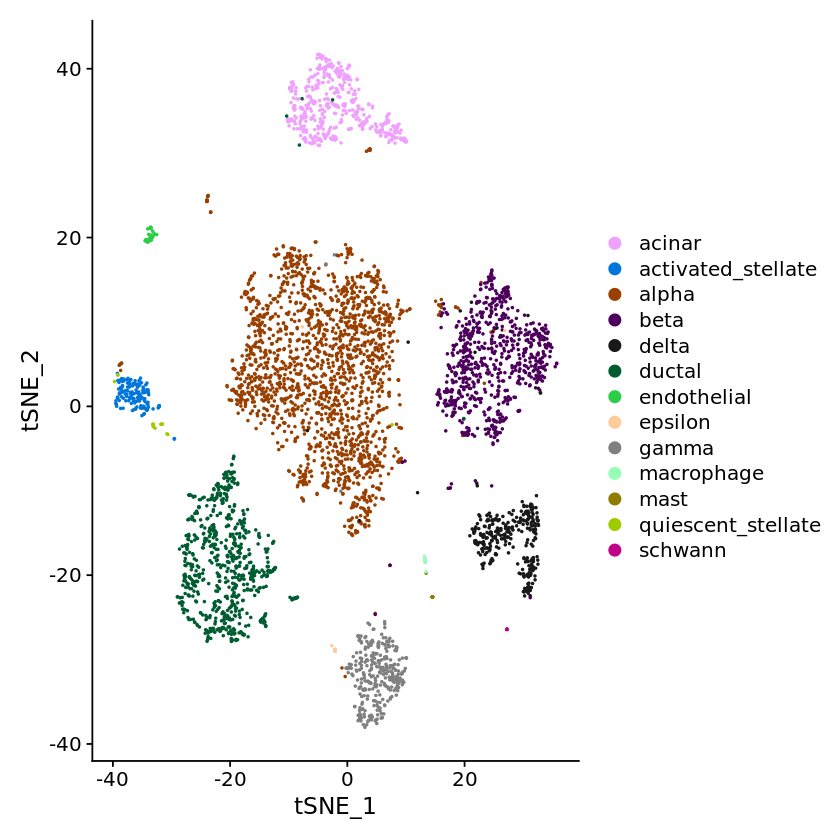

In [33]:
DimPlot(result[[1000]][['MarcoPolovst']],group.by='celltype',cols = DiscretePalette(15))#+ NoLegend()

In [13]:
tosave=matrix(rep(0,length(method_list)*length(nfeatures_list)),
              nrow=length(method_list))
rownames(tosave)=method_list
colnames(tosave)=nfeatures_list

In [14]:
for (method in method_list){
    for (nfeatures in nfeatures_list){
        
        value <- adjustedRandIndex(seurat@meta.data$phenoid, result[[method]][[nfeatures]]@meta.data$seurat_clusters)
        #cat(value)
        tosave[method,sprintf('%s',nfeatures)]<-value
        #cat(method, nfeatures, adjustedRandIndex(seurat@meta.data$phenoid, result[[method]][[nfeatures]]@meta.data$seurat_clusters),'\n')
    }
}

In [15]:
write.table(tosave,sprintf('experiment_result/%s.ARI.tsv',save_name),sep='\t')

In [18]:
write.table(tosave,sprintf('experiment_result/%s.ARI.tsv',save_name),sep='\t')

In [19]:
save_name

[1] "Zhengmix8eq_filtered"

In [29]:
method="MarcoPolomvp"
nfeatures=200

In [ ]:
result[[method]][[nfeatures]]

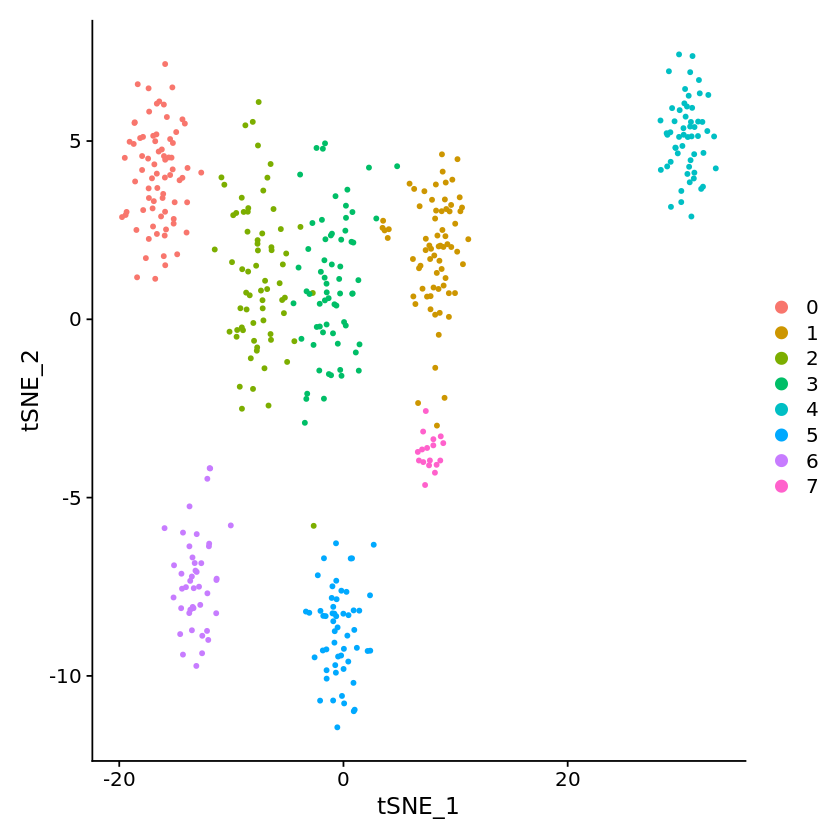

In [31]:
DimPlot(result[[method]][[nfeatures]], reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

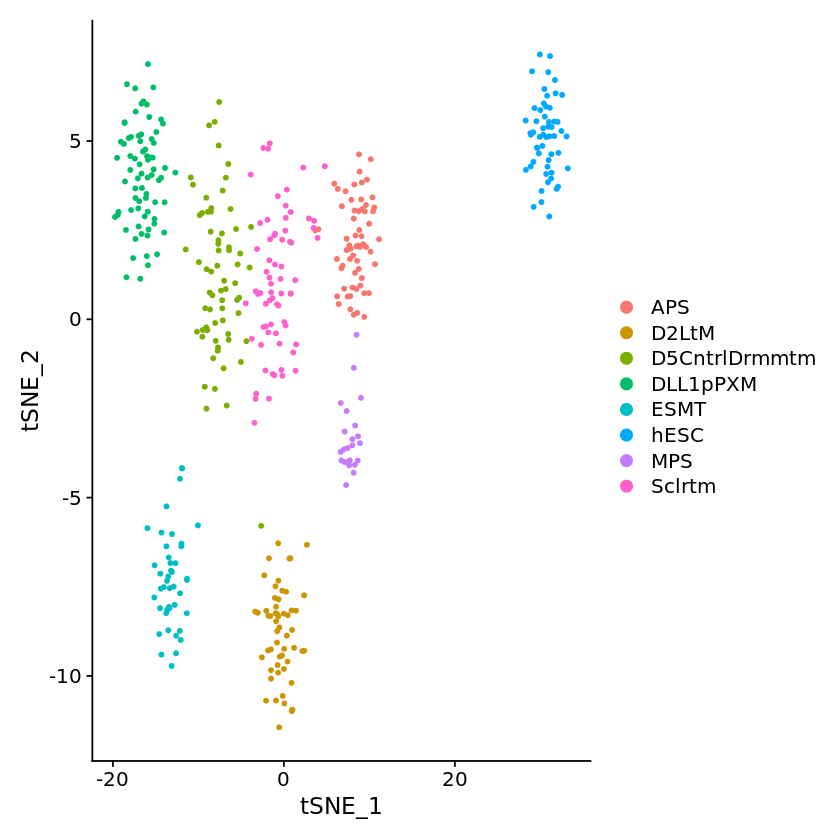

In [32]:
DimPlot(result[[method]][[nfeatures]], group.by='phenoid', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

In [ ]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.6)
)

In [82]:
PC_cluster=50
PC_2D=50
n_features=200

In [84]:
seurat<- FindVariableFeatures(seurat, selection.method = "vst", nfeatures = 2000)

In [85]:
HVG_MarcoPolo1000=unique(c(
                        VariableFeatures(object = seurat_DISP)[1:top_rank1],
                         as.character(MarcoPolo_top[1:top_rank2])
))

In [39]:
MarcoPolo_top[1:100]

[1] ENSG00000143546 ENSG00000115523 ENSG00000163220 ENSG00000019582
  [5] ENSG00000105374 ENSG00000011600 ENSG00000204287 ENSG00000101439
  [9] ENSG00000090382 ENSG00000051523 ENSG00000196126 ENSG00000223865
 [13] ENSG00000237541 ENSG00000254709 ENSG00000231389 ENSG00000161570
 [17] ENSG00000198502 ENSG00000008517 ENSG00000158869 ENSG00000253701
 [21] ENSG00000227507 ENSG00000100453 ENSG00000145649 ENSG00000100097
 [25] ENSG00000124172 ENSG00000105369 ENSG00000171476 ENSG00000126264
 [29] ENSG00000196735 ENSG00000107317 ENSG00000167286 ENSG00000196154
 [33] ENSG00000084207 ENSG00000233276 ENSG00000092841 ENSG00000173762
 [37] ENSG00000204472 ENSG00000170345 ENSG00000077984 ENSG00000197956
 [41] ENSG00000198851 ENSG00000185201 ENSG00000120129 ENSG00000177606
 [45] ENSG00000026025 ENSG00000132465 ENSG00000085265 ENSG00000104894
 [49] ENSG00000197747 ENSG00000198899 ENSG00000172543 ENSG00000100300
 [53] ENSG00000133872 ENSG00000198668 ENSG00000160888 ENSG00000169583
 [57] ENSG00000100906 ENSG00000137441 ENSG00000130429 ENSG00000111716
 [61] ENSG00000163466 ENSG00000117289 ENSG00000180644 ENSG00000181036
 [65] ENSG00000007312 ENSG00000103187 ENSG00000179144 ENSG00000256039
 [69] ENSG00000142227 ENSG00000204482 ENSG00000213719 ENSG00000157514
 [73] ENSG00000104964 ENSG00000130592 ENSG00000172116 ENSG00000130755
 [77] ENSG00000106066 ENSG00000136156 ENSG00000125534 ENSG00000122862
 [81] ENSG00000025708 ENSG00000111229 ENSG00000092010 ENSG00000158710
 [85] ENSG00000197746 ENSG00000213654 ENSG00000136490 ENSG00000111796
 [89] ENSG00000107223 ENSG00000140319 ENSG00000168329 ENSG00000232112
 [93] ENSG00000128340 ENSG00000127184 ENSG00000065978 ENSG00000134539
 [97] ENSG00000116667 ENSG00000169567 ENSG00000099622 ENSG00000106153
4714 Levels: ENSG00000000419 ENSG00000000938 ENSG00000001497 ... ENSG00000273445

In [34]:
seurat_MVP<- FindVariableFeatures(seurat, selection.method = "mvp", nfeatures = 2000)
seurat_MVP1000 <- RunPCA(seurat_MVP, features = VariableFeatures(object = seurat_MVP)[1:n_features])
seurat_MVP1000 <- RunTSNE(seurat_MVP1000, dims= 1:PC_2D)

ERROR: Error in features %||% VariableFeatures(object = object): 객체 'n_features'를 찾을 수 없습니다


In [88]:
seurat_DISP<- FindVariableFeatures(seurat, selection.method = "disp", nfeatures = 2000)
seurat_DISP1000 <- RunPCA(seurat_DISP, features = VariableFeatures(object = seurat_DISP)[1:n_features])
seurat_DISP1000 <- RunTSNE(seurat_DISP1000, dims= 1:PC_2D)

PC_ 1 
Positive:  ENSG00000163220, ENSG00000143546, ENSG00000101439, ENSG00000090382, ENSG00000085265, ENSG00000204472, ENSG00000204482, ENSG00000025708, ENSG00000197766, ENSG00000011600 
	   ENSG00000196126, ENSG00000233276, ENSG00000170458, ENSG00000106565, ENSG00000087086, ENSG00000198502, ENSG00000197746, ENSG00000221869, ENSG00000100079, ENSG00000100097 
	   ENSG00000197249, ENSG00000167996, ENSG00000110077, ENSG00000126759, ENSG00000170296, ENSG00000084207, ENSG00000030582, ENSG00000103490, ENSG00000100300, ENSG00000196154 
Negative:  ENSG00000100316, ENSG00000177954, ENSG00000227507, ENSG00000149273, ENSG00000145425, ENSG00000166710, ENSG00000137154, ENSG00000144713, ENSG00000147403, ENSG00000198034 
	   ENSG00000112306, ENSG00000105640, ENSG00000251562, ENSG00000008517, ENSG00000167526, ENSG00000198727, ENSG00000198938, ENSG00000171223, ENSG00000177606, ENSG00000147604 
	   ENSG00000172543, ENSG00000172116, ENSG00000104894, ENSG00000145649, ENSG00000111796, ENSG00000161570, ENS

In [89]:
seurat_VST1000 <- RunPCA(seurat, features = VariableFeatures(object = seurat)[1:n_features])
seurat_VST1000 <- RunTSNE(seurat_VST1000, dims= 1:PC_2D)

PC_ 1 
Positive:  ENSG00000101439, ENSG00000163220, ENSG00000090382, ENSG00000143546, ENSG00000196126, ENSG00000085265, ENSG00000198502, ENSG00000204472, ENSG00000204482, ENSG00000025708 
	   ENSG00000197766, ENSG00000204287, ENSG00000233276, ENSG00000087086, ENSG00000106565, ENSG00000170458, ENSG00000167996, ENSG00000223865, ENSG00000019582, ENSG00000100079 
	   ENSG00000197746, ENSG00000066336, ENSG00000197249, ENSG00000126759, ENSG00000030582, ENSG00000110077, ENSG00000179344, ENSG00000170296, ENSG00000204257, ENSG00000104870 
Negative:  ENSG00000166710, ENSG00000105374, ENSG00000115523, ENSG00000145649, ENSG00000251562, ENSG00000077984, ENSG00000172543, ENSG00000100453, ENSG00000169583, ENSG00000111796 
	   ENSG00000137441, ENSG00000171476, ENSG00000180644, ENSG00000161570, ENSG00000150045, ENSG00000203747, ENSG00000159674, ENSG00000134539, ENSG00000100450, ENSG00000129277 
	   ENSG00000007264, ENSG00000145287, ENSG00000134545, ENSG00000126264, ENSG00000008517, ENSG00000117281, ENS

In [90]:
seurat_MarcoPolo1000 <- RunPCA(seurat, features = MarcoPolo_top[1:n_features])
seurat_MarcoPolo1000 <- RunTSNE(seurat_MarcoPolo1000, dims = 1:PC_2D)

PC_ 1 
Positive:  ENSG00000166710, ENSG00000101608, ENSG00000169583, ENSG00000184009, ENSG00000163466, ENSG00000165119, ENSG00000163682, ENSG00000136942, ENSG00000165678, ENSG00000147443 
	   ENSG00000089327, ENSG00000213719, ENSG00000144746, ENSG00000074966, ENSG00000086598, ENSG00000111670, ENSG00000245164, ENSG00000153283, ENSG00000137876, ENSG00000078596 
	   ENSG00000153187, ENSG00000125148, ENSG00000143851, ENSG00000162385, ENSG00000213585, ENSG00000068028, ENSG00000085224, ENSG00000097033, ENSG00000085231, ENSG00000262074 
Negative:  ENSG00000204482, ENSG00000173442, ENSG00000164587, ENSG00000158517, ENSG00000180389, ENSG00000169228, ENSG00000159128, ENSG00000167995, ENSG00000112096, ENSG00000104907 
	   ENSG00000182287, ENSG00000144218, ENSG00000133961, ENSG00000125652, ENSG00000171298, ENSG00000167553, ENSG00000137101, ENSG00000010295, ENSG00000109111, ENSG00000115286 
	   ENSG00000160194, ENSG00000157637, ENSG00000110777, ENSG00000204673, ENSG00000083457, ENSG00000107872, ENS

In [92]:
#top_rank1=1240
#top_rank1=650#(Zheng8,1000)
#top_rank1=380#(Zheng8,600)
#top_rank1=190#(Zheng8,300)
#top_rank1=190#(Zheng8,300)
top_rank1=120#(Zheng8,200)
#top_rank1=70#(Zheng8,100)
#top_rank1=570#(Koh)
#top_rank1=275#(Koh,400)
#top_rank1=220#(Koh,300)
#top_rank1=110#(Koh,200)
#top_rank1=55#(Koh,100)
#top_rank1=27#(Koh,50)
#top_rank1=300

# koh marcopolo: 100 other: 600

top_rank2=as.integer(top_rank1/1)

HVG_MarcoPolo1000=unique(c(
                        VariableFeatures(object = seurat_DISP)[1:top_rank1],
                         as.character(MarcoPolo_top[1:top_rank2])
))

print(length(HVG_MarcoPolo1000))

seurat_HVGMarcoPolo1000 <- RunPCA(seurat, features = HVG_MarcoPolo1000)
seurat_HVGMarcoPolo1000 <- RunTSNE(seurat_HVGMarcoPolo1000, dims = 1:PC_2D)

[1] 194


PC_ 1 
Positive:  ENSG00000163220, ENSG00000143546, ENSG00000101439, ENSG00000090382, ENSG00000085265, ENSG00000204472, ENSG00000204482, ENSG00000025708, ENSG00000196126, ENSG00000197766 
	   ENSG00000198502, ENSG00000233276, ENSG00000170458, ENSG00000106565, ENSG00000087086, ENSG00000011600, ENSG00000197746, ENSG00000100079, ENSG00000221869, ENSG00000167996 
	   ENSG00000197249, ENSG00000100097, ENSG00000204287, ENSG00000110077, ENSG00000126759, ENSG00000019582, ENSG00000030582, ENSG00000100300, ENSG00000090013, ENSG00000103490 
Negative:  ENSG00000177954, ENSG00000100316, ENSG00000166710, ENSG00000227507, ENSG00000137154, ENSG00000111716, ENSG00000198851, ENSG00000147403, ENSG00000251562, ENSG00000167286 
	   ENSG00000173762, ENSG00000133872, ENSG00000104964, ENSG00000008517, ENSG00000128340, ENSG00000136156, ENSG00000117289, ENSG00000065978, ENSG00000198668, ENSG00000179144 
	   ENSG00000109971, ENSG00000198938, ENSG00000172543, ENSG00000171223, ENSG00000185201, ENSG00000163479, ENS

# Visualization

# MVP1000

In [93]:
seurat_MVP1000_label <- FindNeighbors(seurat_MVP1000, dims = 1:PC_cluster)
seurat_MVP1000_label <- FindClusters(seurat_MVP1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))
seurat_MVP1000_label_oldUMAP <- FindClusters(seurat_MVP1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 281643

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8936
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 281643

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8497
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 281643

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8101
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 281643

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7812
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimiz

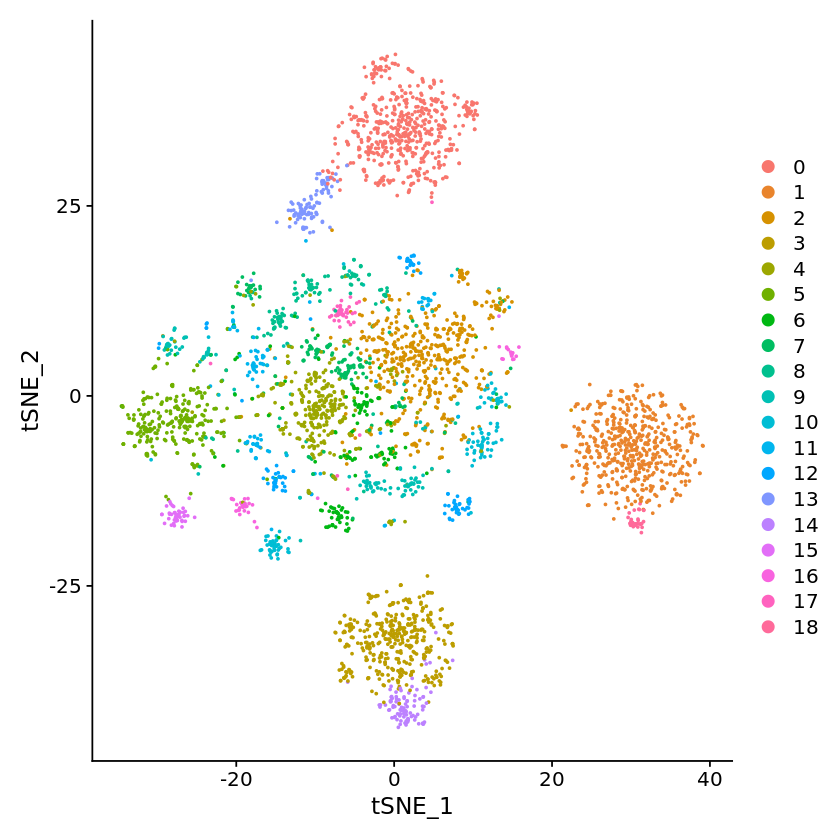

In [94]:
DimPlot(seurat_MVP1000_label, group.by='RNA_snn_res.1.6', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

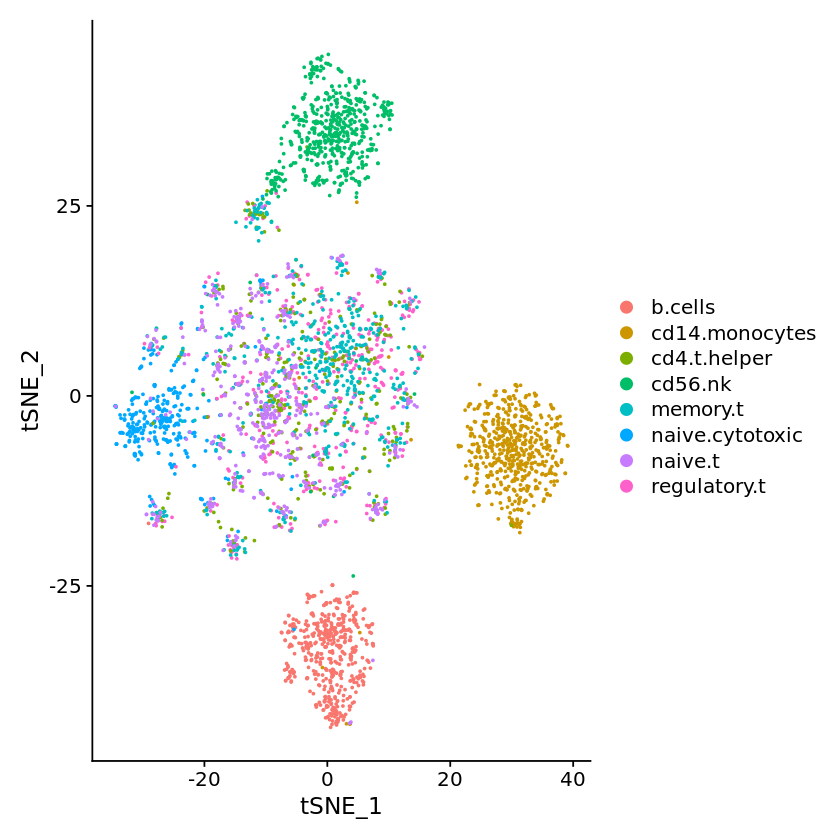

In [95]:
DimPlot(seurat_MVP1000_label, group.by='phenoid', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

In [96]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MVP1000_label@meta.data$RNA_snn_res.1.6)
)

[1] 0.4394694 0.4495318 0.5469296 0.5632238 0.5662625 0.5410177 0.5509408

# VST1000

In [97]:
seurat_VST1000_label <- FindNeighbors(seurat_VST1000, dims = 1:PC_cluster)
seurat_VST1000_label <- FindClusters(seurat_VST1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))
seurat_VST1000_label_oldUMAP <- FindClusters(seurat_VST1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 247368

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8869
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 247368

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8494
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 247368

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8142
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 247368

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7867
Number of communities: 14
Elapsed time: 0 seconds
Modularity Optimi

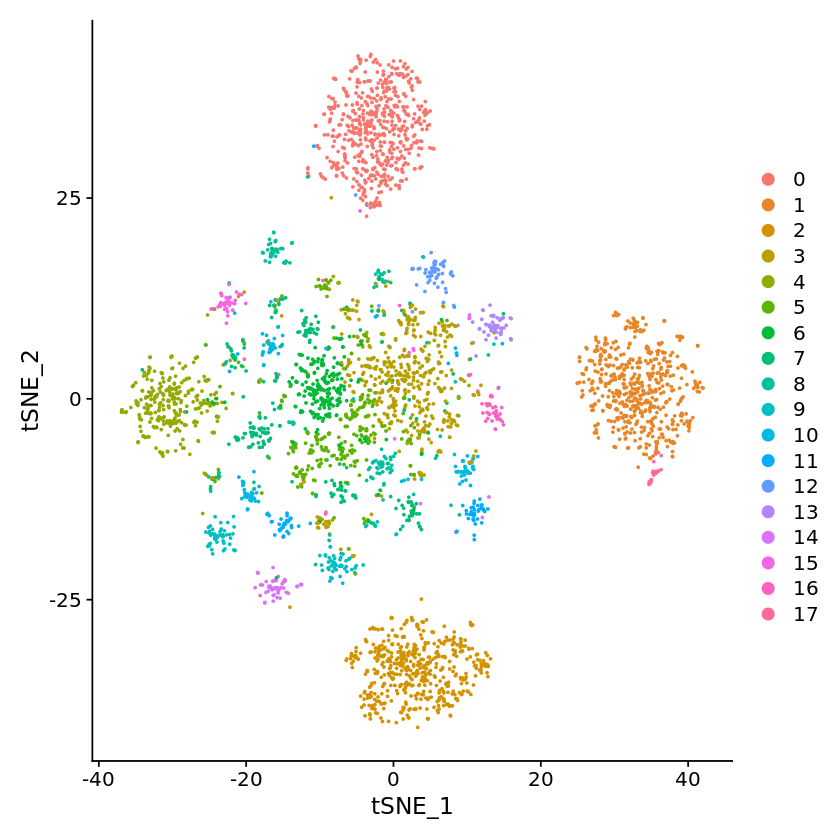

In [98]:
DimPlot(seurat_VST1000_label, group.by='RNA_snn_res.1.6', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

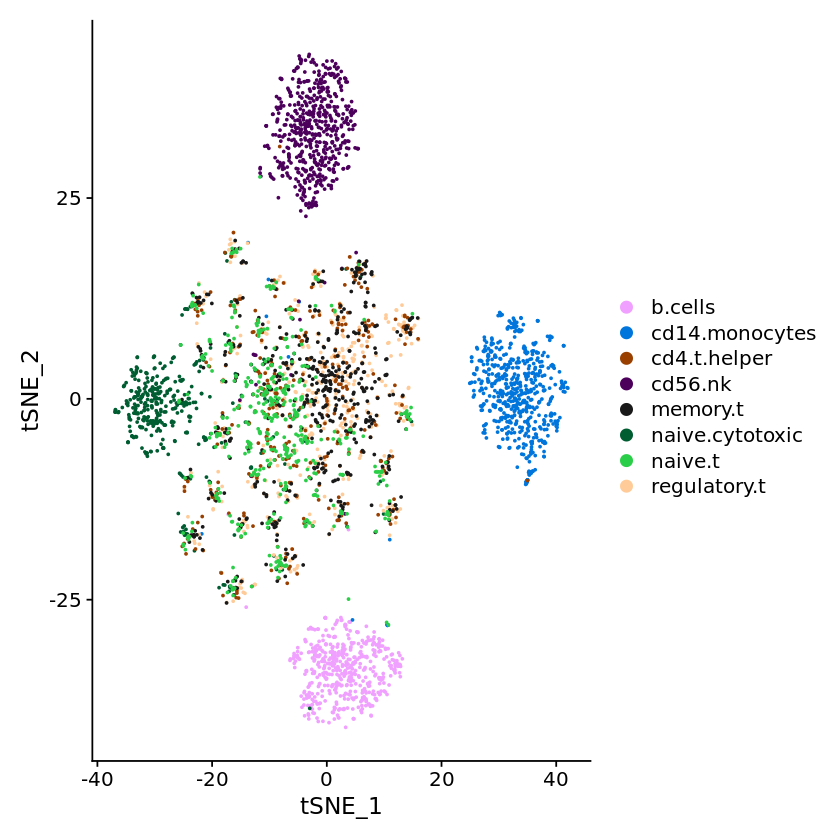

In [99]:
DimPlot(seurat_VST1000_label, group.by='phenoid', reduction = "tsne", cols = DiscretePalette(26))#, pt.size =2)

In [100]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_VST1000_label@meta.data$RNA_snn_res.1.6)
)

[1] 0.4866040 0.4919544 0.5068769 0.5848125 0.5888477 0.5931121 0.5937474

# DISP1000

In [101]:
seurat_DISP1000_label <- FindNeighbors(seurat_DISP1000, dims = 1:PC_cluster)
seurat_DISP1000_label <- FindClusters(seurat_DISP1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))
seurat_DISP1000_label_oldUMAP <- FindClusters(seurat_DISP1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 263165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8925
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 263165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8481
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 263165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8157
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 263165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7859
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimiz

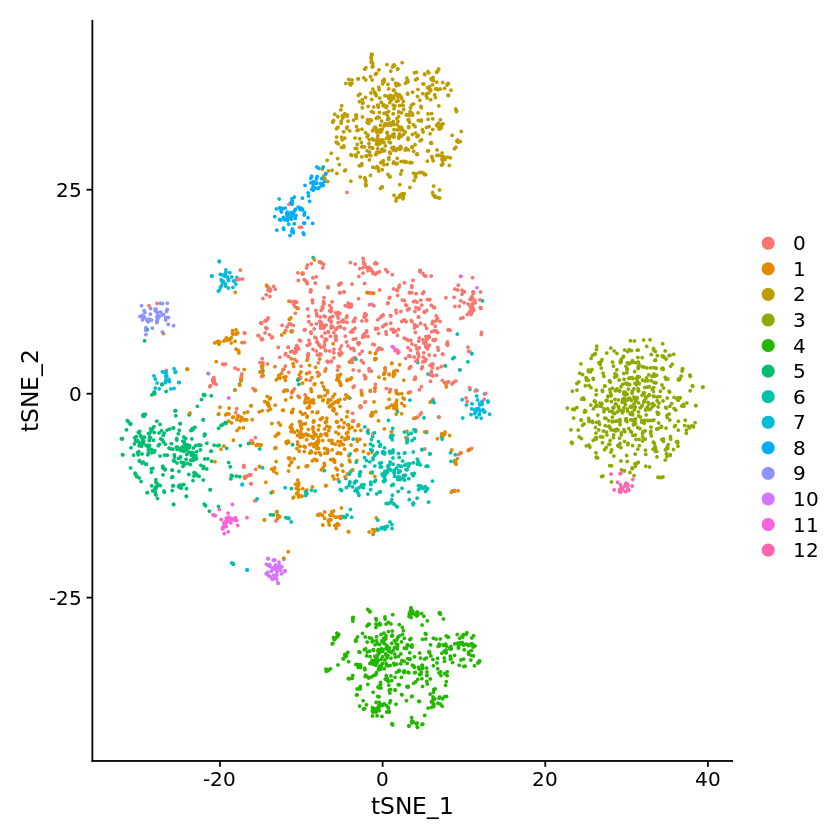

In [102]:
DimPlot(seurat_DISP1000_label, group.by='RNA_snn_res.1', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

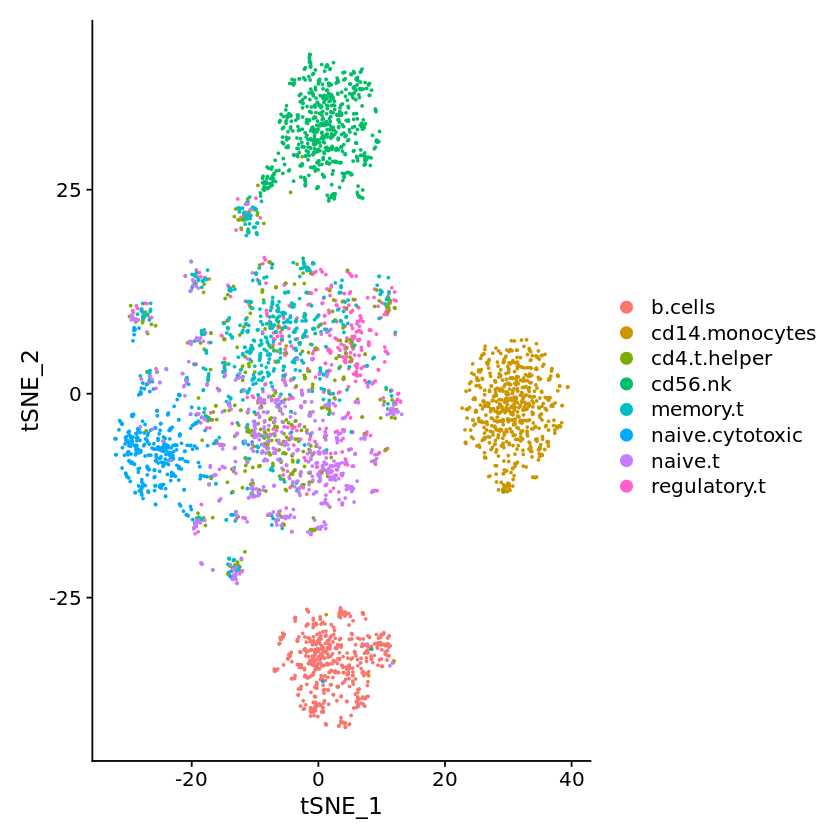

In [103]:
DimPlot(seurat_DISP1000_label, group.by='phenoid', reduction = "tsne")#, cols = DiscretePalette(26))#, pt.size =2)

In [104]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_DISP1000_label@meta.data$RNA_snn_res.1.6)
)

[1] 0.4615693 0.4721573 0.5823281 0.5792455 0.5928356 0.5849629 0.5768799

# HVGMarcoPolo1000

In [105]:
seurat_HVGMarcoPolo1000_label <- FindNeighbors(seurat_HVGMarcoPolo1000, dims = 1:PC_cluster)
seurat_HVGMarcoPolo1000_label <- FindClusters(seurat_HVGMarcoPolo1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))
seurat_HVGMarcoPolo1000_label_oldUMAP <- FindClusters(seurat_HVGMarcoPolo1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 211487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8979
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 211487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 211487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8197
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 211487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7889
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimiz

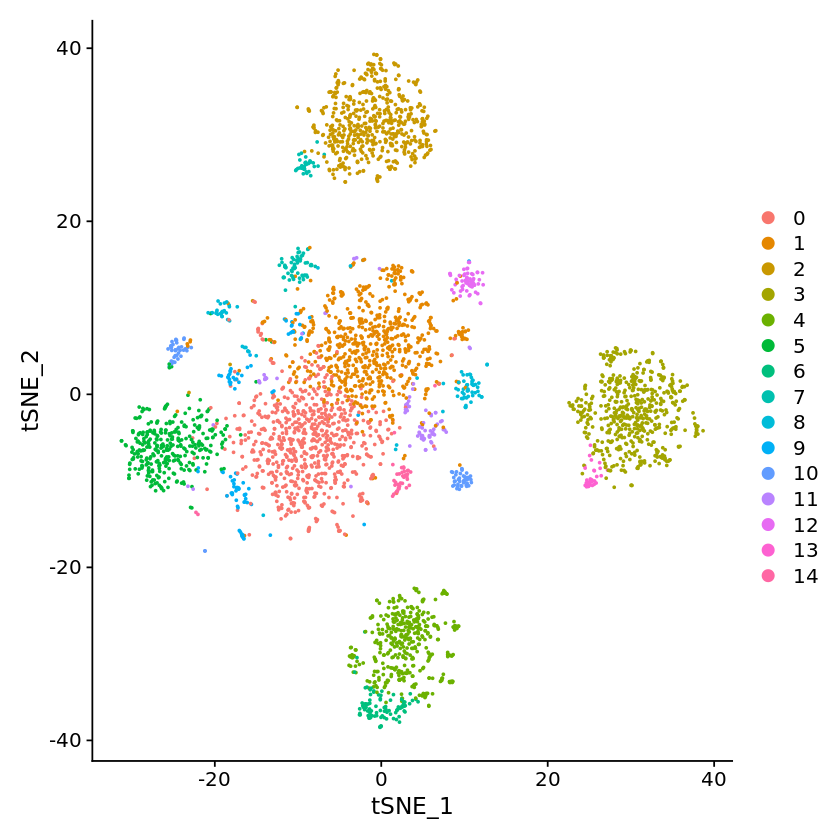

In [106]:
DimPlot(seurat_HVGMarcoPolo1000_label, group.by='RNA_snn_res.1.6', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

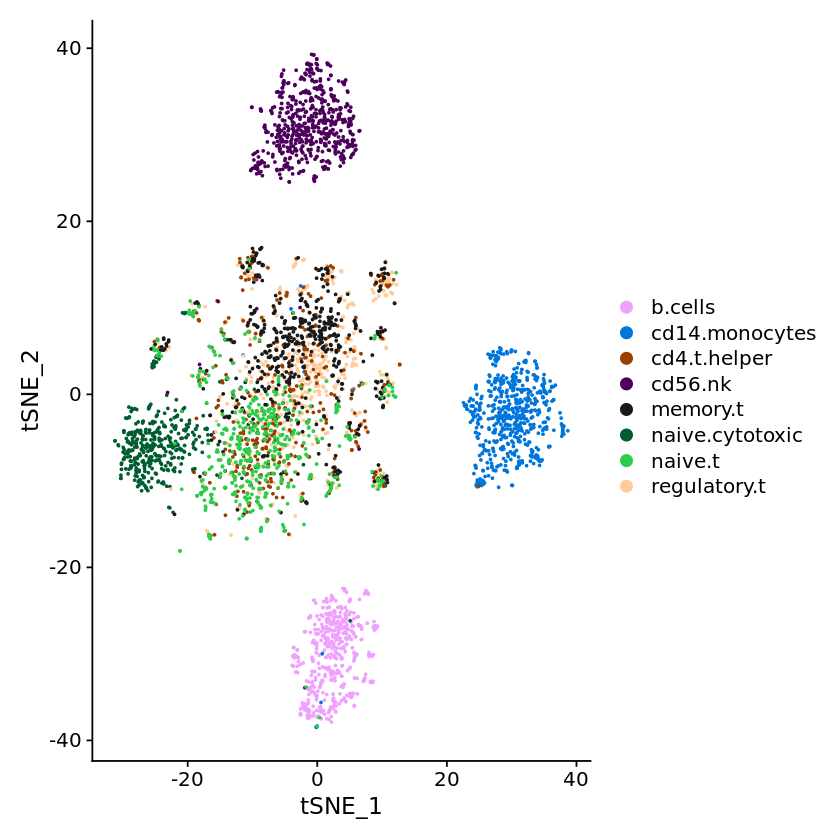

In [107]:
DimPlot(seurat_HVGMarcoPolo1000_label, group.by='phenoid', reduction = "tsne", cols = DiscretePalette(26))#, pt.size =2)

In [108]:
#FindMarkers(seurat_HVGMarcoPolo1000_label, ident.1='cd4.t.helper', ident.2='regulatory.t', group.by='phenoid')

In [109]:
#seurat[,(seurat@meta.data$phenoid=='cd4.t.helper')|(seurat@meta.data$phenoid=='regulatory.t')]@meta.data

In [110]:
#help(FindMarkers)

In [111]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_HVGMarcoPolo1000_label@meta.data$RNA_snn_res.1.6)
)

[1] 0.4856575 0.4875807 0.5890519 0.6008890 0.5911532 0.5923222 0.5650854

# MarcoPolo1000

In [77]:
seurat_MarcoPolo1000_label <- FindNeighbors(seurat_MarcoPolo1000, dims = 1:PC_cluster)
seurat_MarcoPolo1000_label <- FindClusters(seurat_MarcoPolo1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))
seurat_MarcoPolo1000_label_oldUMAP <- FindClusters(seurat_MarcoPolo1000_label, resolution = c(0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 219049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7061
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 219049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6542
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 219049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6167
Number of communities: 17
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3994
Number of edges: 219049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5947
Number of communities: 24
Elapsed time: 0 seconds
Modularity Optimi

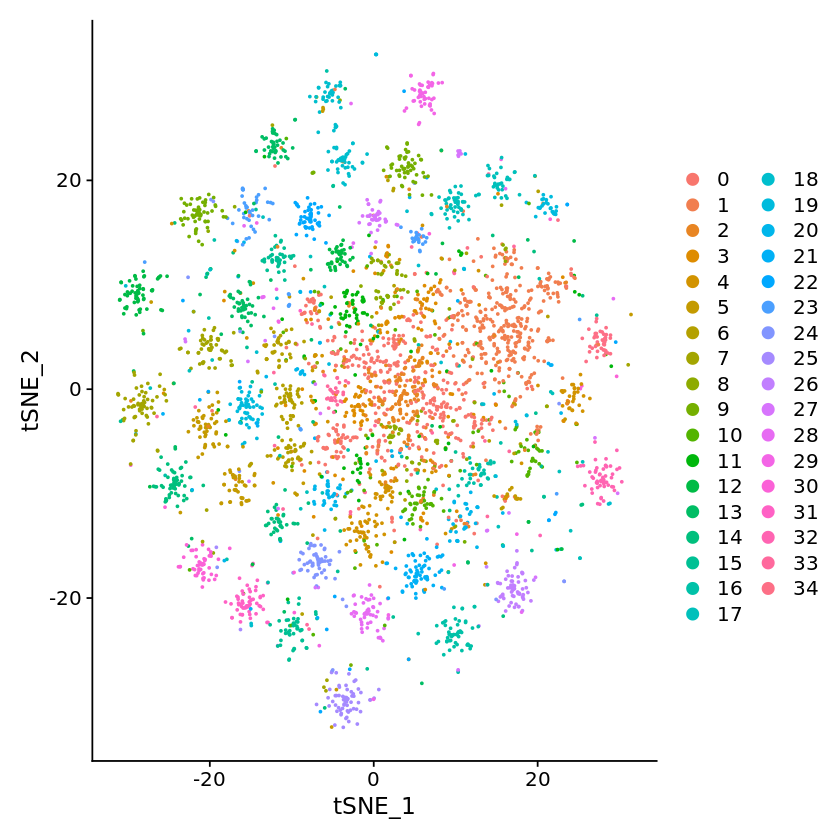

In [81]:
DimPlot(seurat_MarcoPolo1000_label, group.by='RNA_snn_res.1.6', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

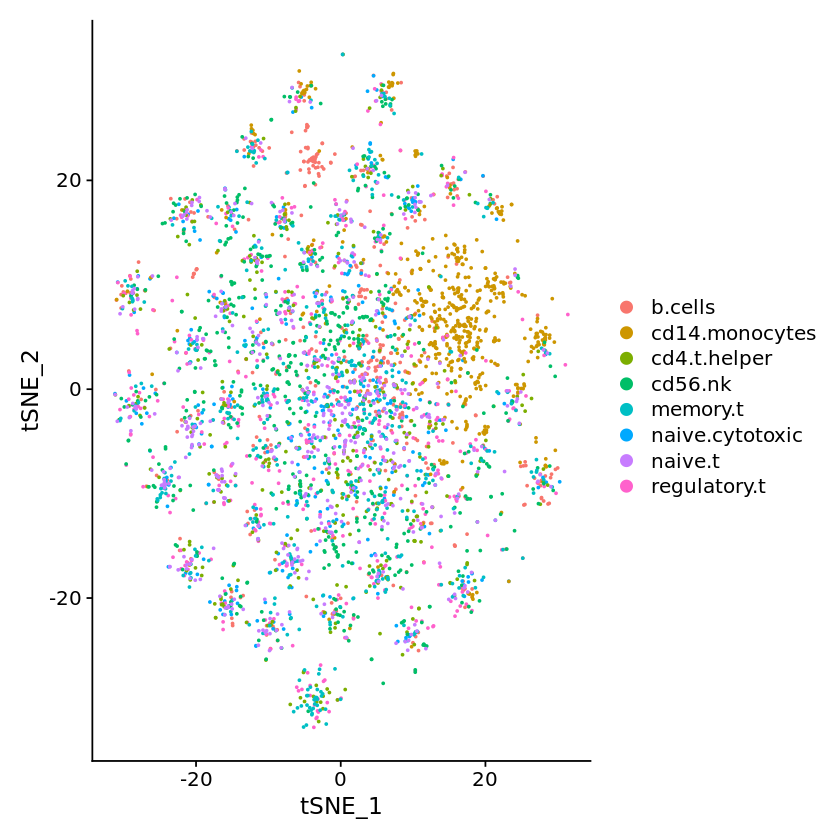

In [79]:
DimPlot(seurat_MarcoPolo1000_label, group.by='phenoid', reduction = "tsne")#, cols = DiscretePalette(26), pt.size =2)

In [80]:
c(
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.0.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.0.6),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.0.8),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.1),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.1.2),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.1.4),
    adjustedRandIndex(seurat@meta.data$phenoid, seurat_MarcoPolo1000_label@meta.data$RNA_snn_res.1.6)
)

[1] 0.05306693 0.06802145 0.06533597 0.07335214 0.06734568 0.07065586 0.07498299

In [ ]:
slotNames(seurat_HVG1000_label)

In [ ]:
seurat<- FindVariableFeatures(seurat, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seurat), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seurat)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [ ]:
all.genes <- rownames(seurat)
seurat=ScaleData(seurat,features = all.genes)

In [ ]:
seurat1_PCA <- RunPCA(seurat, features = VariableFeatures(object = seurat))

In [ ]:
seurat2_PCA <- RunPCA(seurat, features = MarcoPolo_top)

In [ ]:
plot1=ElbowPlot(seurat1_PCA)
plot1

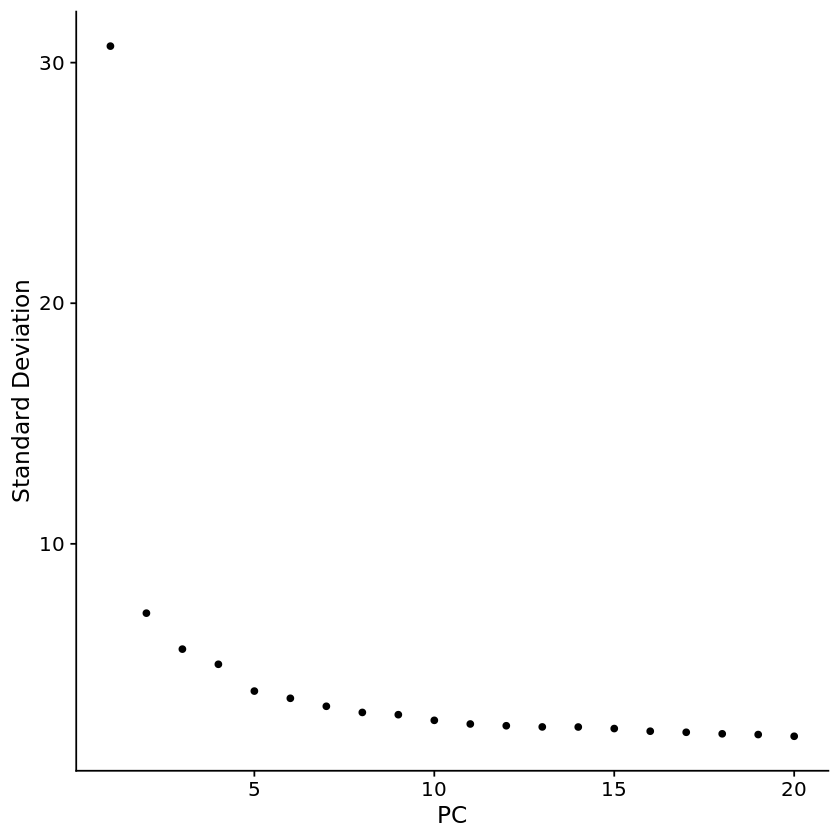

In [16]:
plot2=ElbowPlot(seurat2_PCA)
plot2

In [20]:
if(FALSE){
seurat3_PCA=ScaleData(seurat,features = all.genes)

mat1=Embeddings(seurat1_PCA,reduction="pca")[,1:25]
mat2=Embeddings(seurat2_PCA,reduction="pca")[,1:25]
mat=cbind(mat1,mat2)
colnames(mat) <- paste0("PC_", 1:50)

seurat3_PCA[["pca"]] <- CreateDimReducObject(embeddings = mat,
                                             key='PC_',
                                             assay=DefaultAssay(seurat3_PCA))
}

In [21]:
#length(VariableFeatures(object = seurat))

In [22]:
length(unique(c(VariableFeatures(object = seurat)[1:1044],
         MarcoPolo_top[1:1044])))
HVG_MarcoPolo_mix=unique(c(VariableFeatures(object = seurat)[1:1044],
                         MarcoPolo_top[1:1044]))
seurat3_PCA <- RunPCA(seurat, features = HVG_MarcoPolo_mix)

[1] 1890

PC_ 1 
Positive:  Ccl5, Hes1, Arg1, Ccdc88c, Cxcl3, Ifitm1, G0s2, Ccl8, Slc12a2, S100a9 
	   S100a8, Spp1, Hist1h2ap, Mirt1, Pbx1, Hspa1a, Slpi, Hspa1b, Ccl4, Csf1 
	   Rbpms, Mgl2, Ccl3, Gpnmb, Pglyrp1, Cxcl10, Errfi1, Tppp3, Ptgs2, Mt1 
Negative:  Rpl23a, Rpl27a, Oaz1, Rpl11, Morf4l1, Rpl41, Clic1, Rpl13, Arf1, Cox6b1 
	   Tpm3, Arhgdia, Atp6v0b, Naca, Cox6c, Reep5, Pomp, Ubl5, Rps2, Tomm7 
	   Psma3, Arpc4, Ndufa2, Eif3c, Sh3glb1, Rpl10a, Pcbp1, Tmsb4x, Atp5c1, Cox5a 
PC_ 2 
Positive:  Plac8, Dusp16, Gsr, Gpr141, Ace, Mcemp1, Nr4a1, Samsn1, Gcnt2, Napsa 
	   Ifitm6, Mxd1, Gda, Clec4e, Itgal, Hp, Ly6i, Adgre4, Pglyrp1, Cd274 
	   Gpcpd1, Trim30b, Eno3, Nxpe4, Treml4, Oas3, Pbxip1, Ripor2, Trem3, Rasgrp2 
Negative:  C1qc, C1qa, C1qb, Prdx4, Ranbp1, Hmgn1, Cd81, C1qbp, Slc25a4, Pa2g4 
	   Stmn1, Ckb, Rab3il1, Ran, Ppp1r14b, Cadm1, Atpif1, Atp5g1, Clec4b1, Sdf2l1 
	   Nhp2, Dctpp1, P2ry6, Ntpcr, Fkbp2, Erh, Rpn1, Ndufab1, Oxct1, Nop58 
PC_ 3 
Positive:  Eno3, Itgal, Ace, Napsa, Spn, Adg

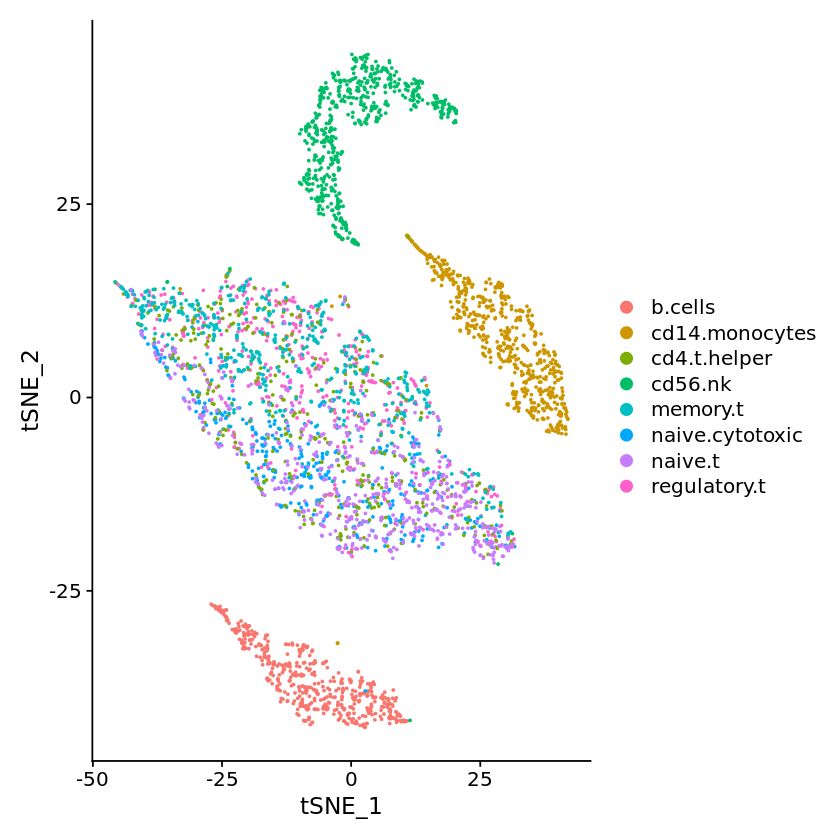

In [19]:
seurat1_PCA_TSNE <- RunTSNE(seurat1_PCA, dims= 1:5)
DimPlot(seurat1_PCA_TSNE, group.by='phenoid', reduction = "tsne")

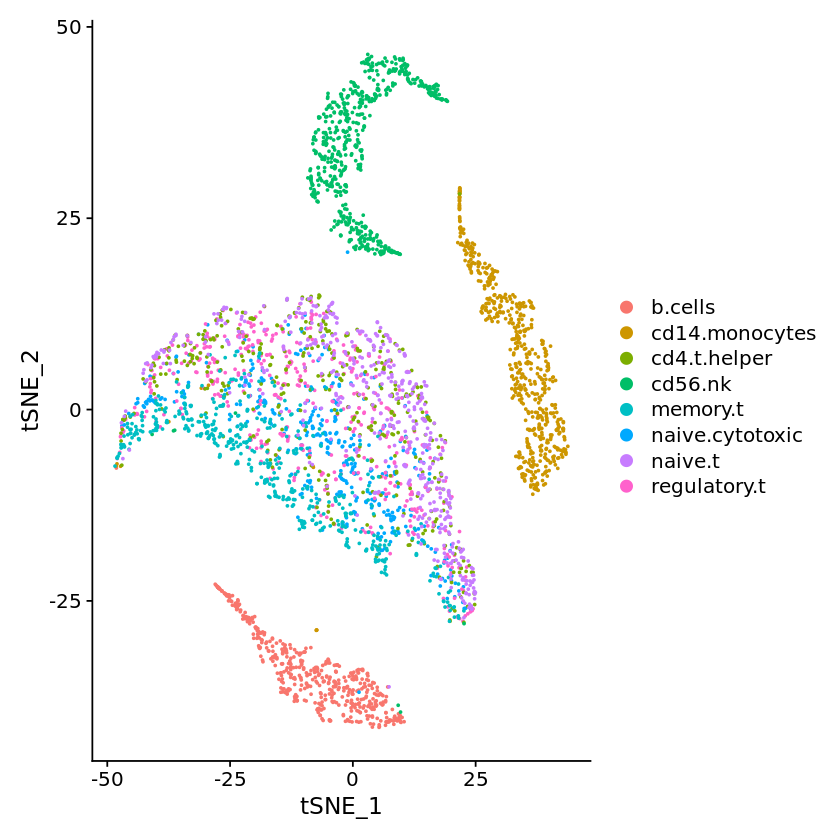

In [20]:
seurat2_PCA_TSNE <- RunTSNE(seurat2_PCA, dims= 1:5)
DimPlot(seurat2_PCA_TSNE, group.by='phenoid', reduction = "tsne")

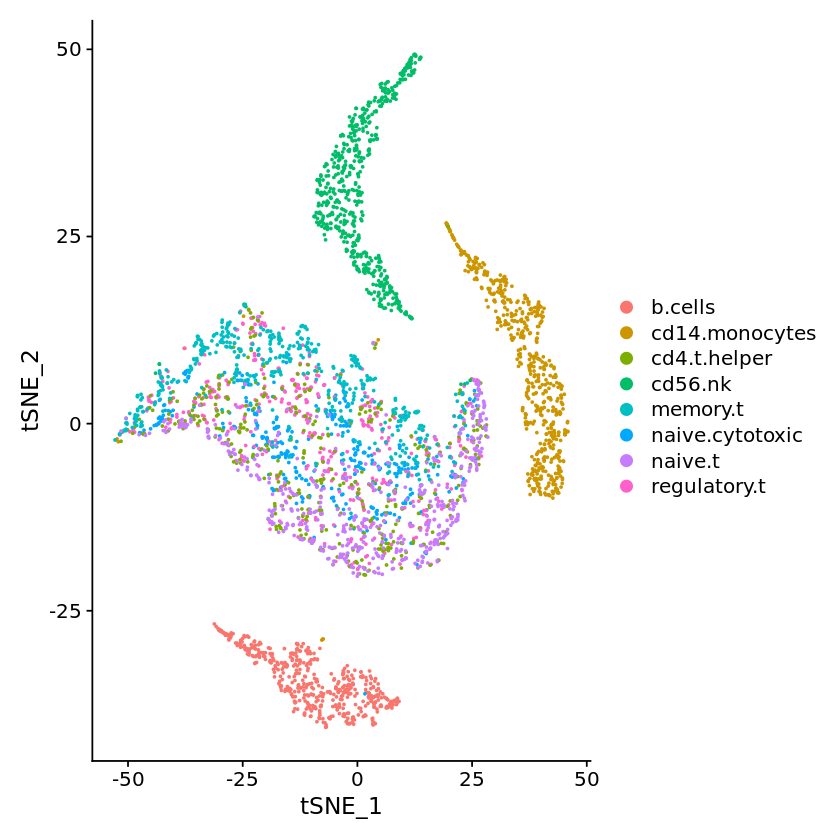

In [21]:
seurat3_PCA_TSNE <- RunTSNE(seurat3_PCA, dims= 1:5)
DimPlot(seurat3_PCA_TSNE, group.by='phenoid', reduction = "tsne")

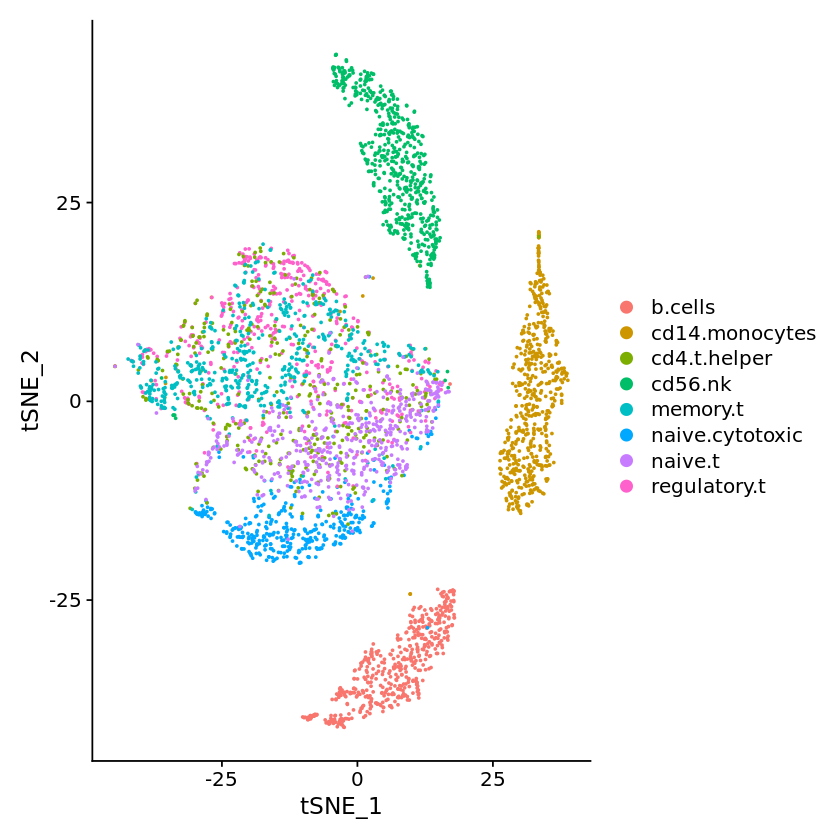

In [25]:
seurat1_PCA_TSNE <- RunTSNE(seurat1_PCA, dims= 1:10)
DimPlot(seurat1_PCA_TSNE, group.by='phenoid', reduction = "tsne")

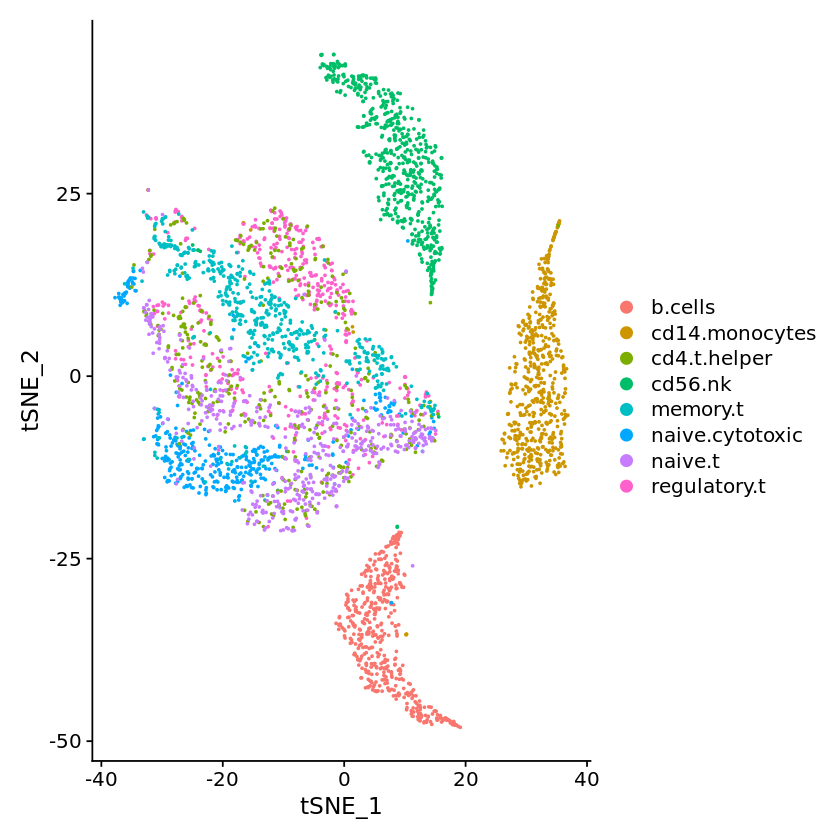

In [26]:
seurat2_PCA_TSNE <- RunTSNE(seurat2_PCA, dims= 1:10)
DimPlot(seurat2_PCA_TSNE, group.by='phenoid', reduction = "tsne")

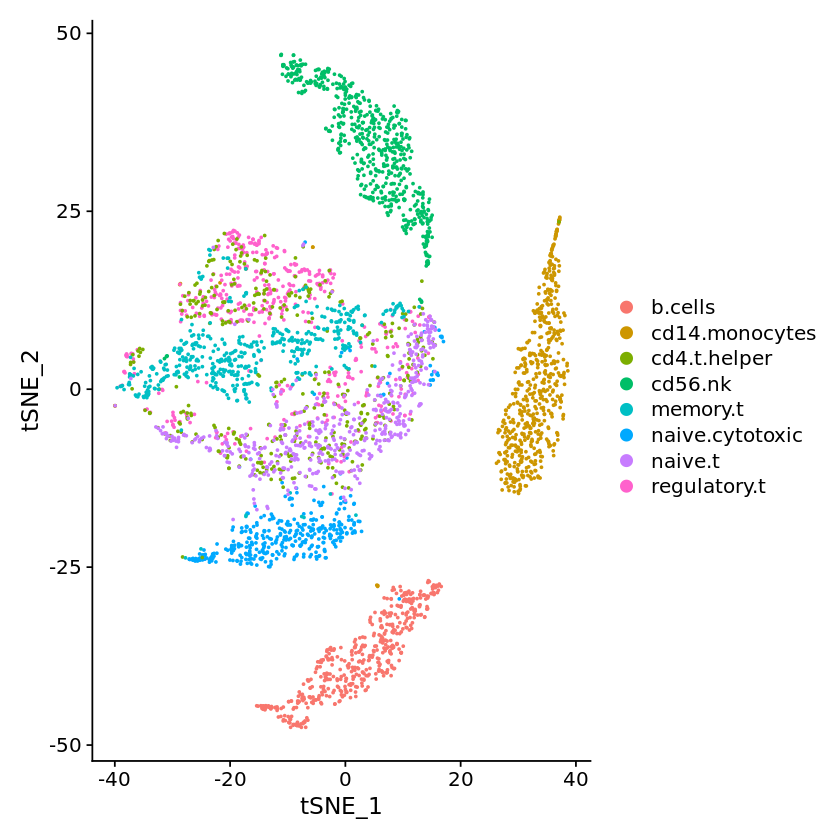

In [27]:
seurat3_PCA_TSNE <- RunTSNE(seurat3_PCA, dims= 1:10)
DimPlot(seurat3_PCA_TSNE, group.by='phenoid', reduction = "tsne")

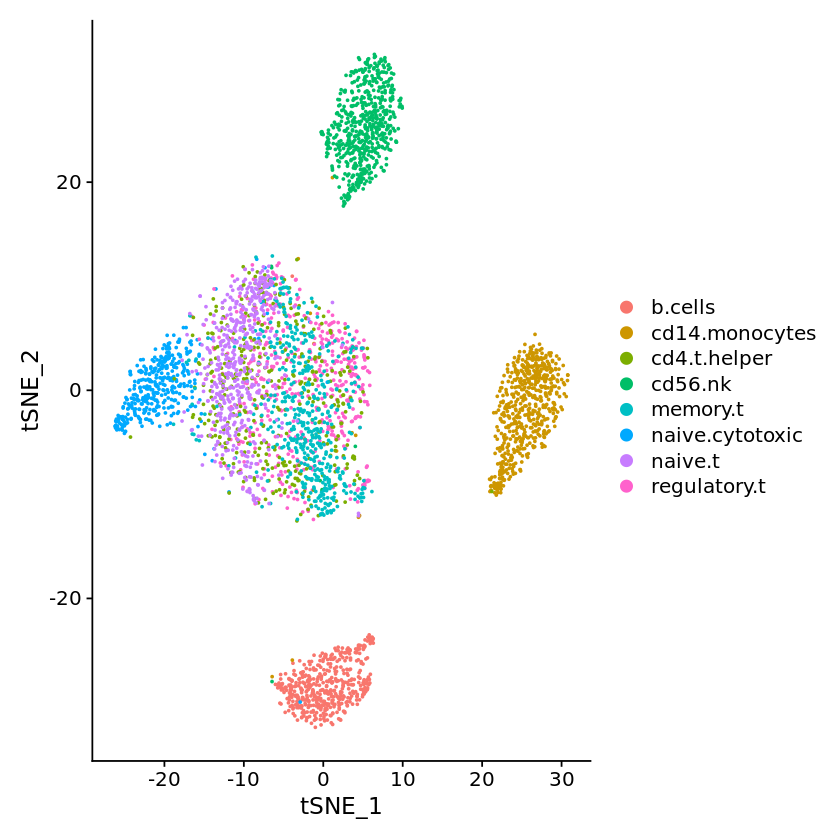

In [28]:
seurat1_PCA_TSNE <- RunTSNE(seurat1_PCA, dims= 1:50)
DimPlot(seurat1_PCA_TSNE, group.by='phenoid', reduction = "tsne")

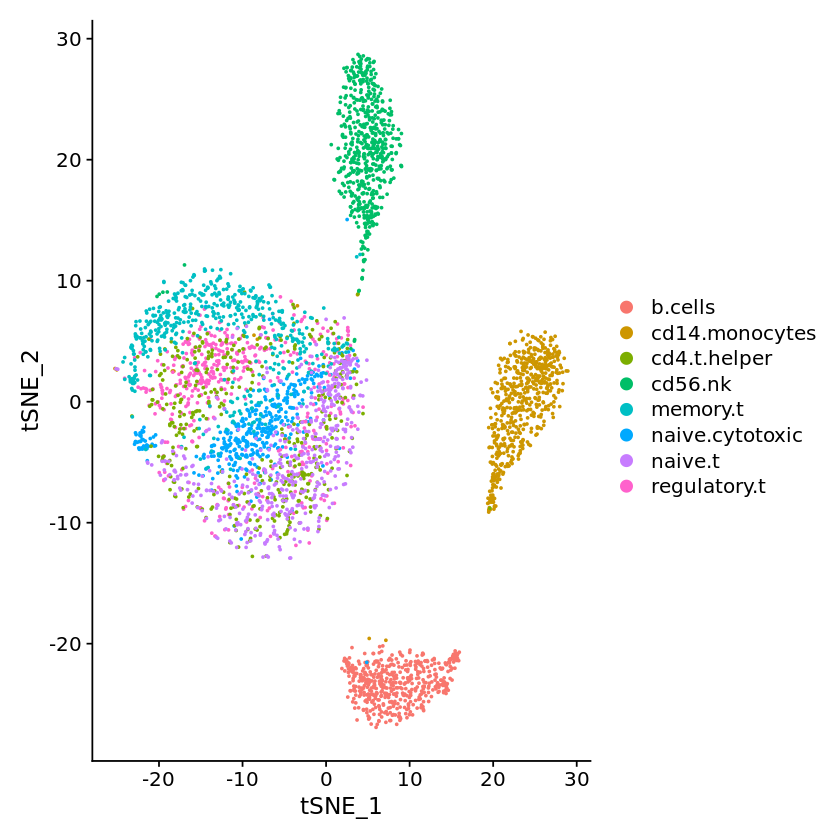

In [29]:
seurat2_PCA_TSNE <- RunTSNE(seurat2_PCA, dims= 1:50)
DimPlot(seurat2_PCA_TSNE, group.by='phenoid', reduction = "tsne")

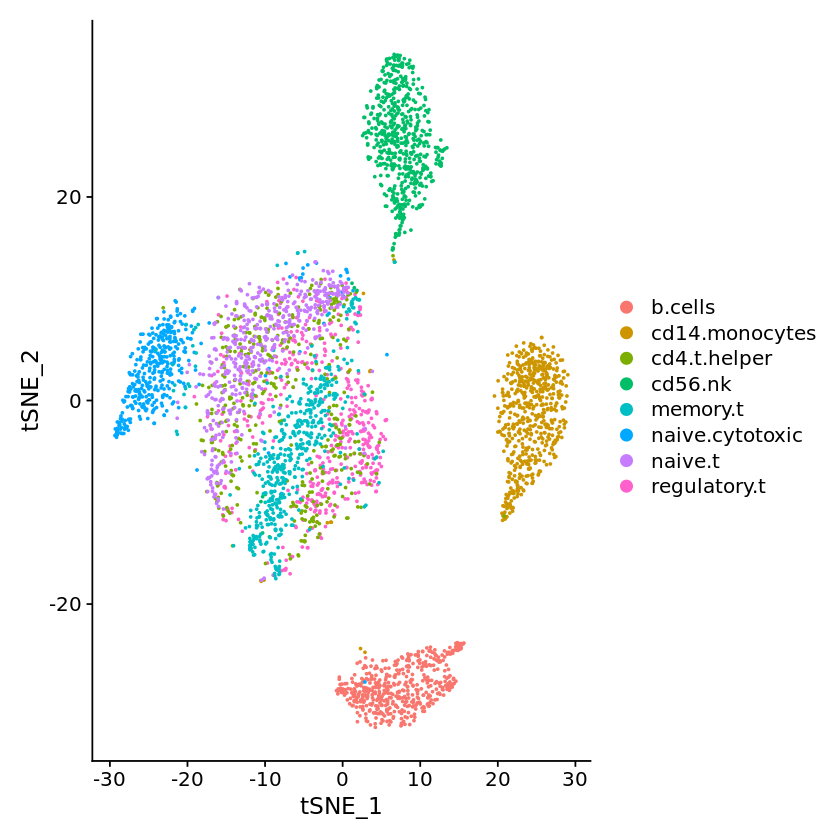

In [30]:
seurat3_PCA_TSNE <- RunTSNE(seurat3_PCA, dims= 1:50)
DimPlot(seurat3_PCA_TSNE, group.by='phenoid', reduction = "tsne")

In [14]:
#seurat@meta.data['seurat_clusters']

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222
Number of edges: 6321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 1
Elapsed time: 0 seconds


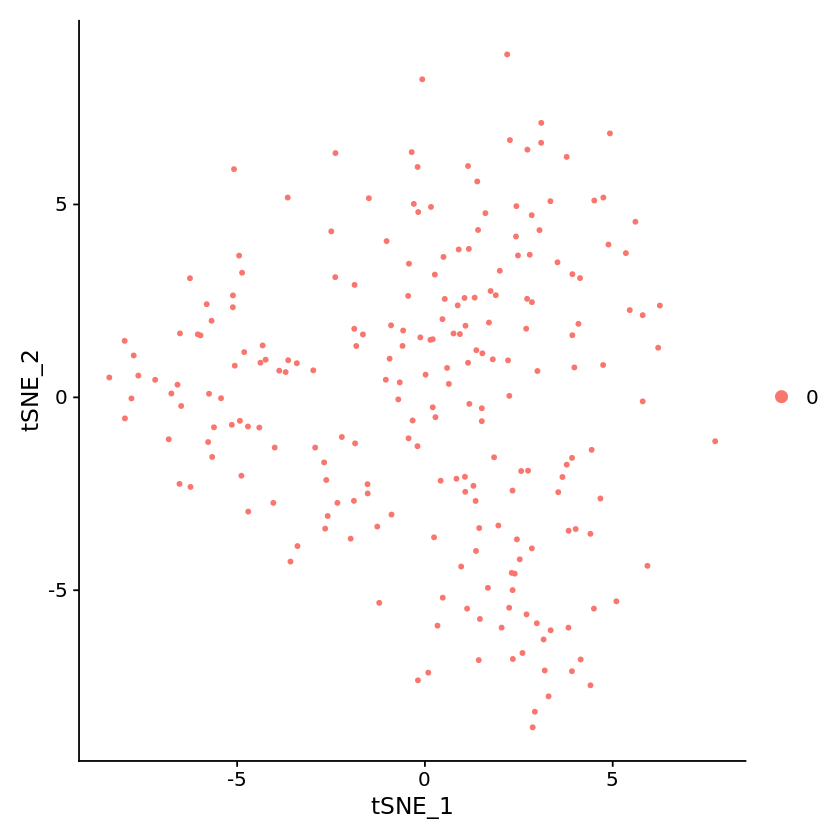

In [15]:
seurat1 <- FindNeighbors(seurat1, dims = 1:10)
seurat1 <- FindClusters(seurat1, resolution = 0.1)

#Idents(seurat)=seurat@meta.data['seurat_clusters']
#markers <- FindAllMarkers(seurat, test.use="wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)
#write.table(markers,sprintf('datasets/extract/%s.clusteringdeg.%s.tsv',save_name,'0_5'),sep='\t')
write.table(seurat1@meta.data['seurat_clusters'],sprintf('datasets/extract/%s.clusterlabel.tsv',save_name),sep='\t')
DimPlot(seurat1, reduction = "tsne")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222
Number of edges: 6321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7327
Number of communities: 3
Elapsed time: 0 seconds


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



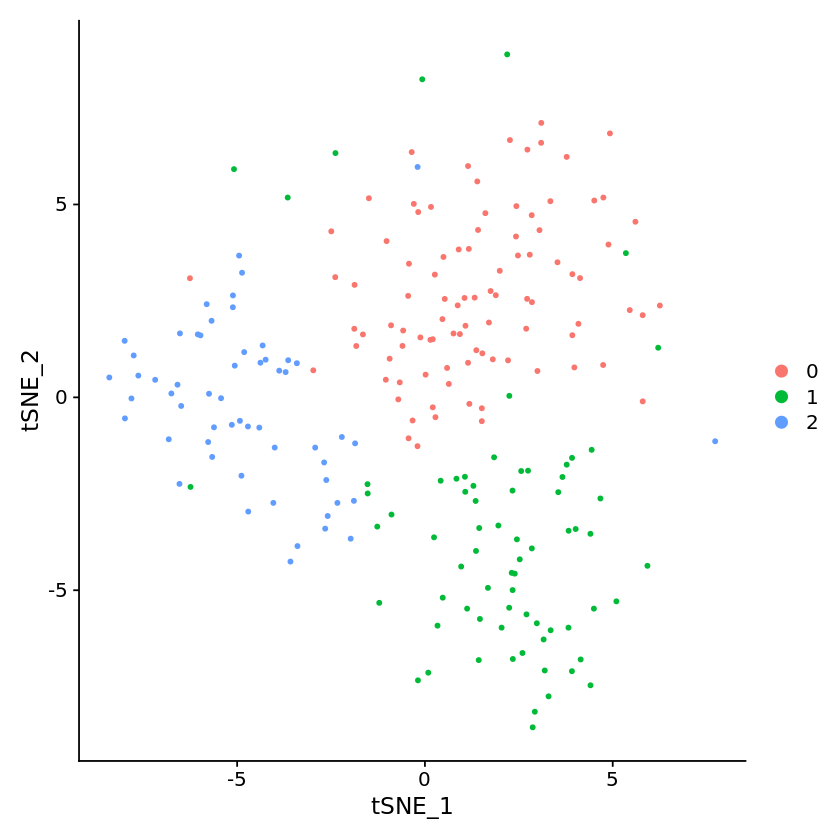

In [16]:
seurat1 <- FindNeighbors(seurat1, dims = 1:10)
seurat1 <- FindClusters(seurat1, resolution = 0.5)

Idents(seurat1)=seurat1@meta.data['seurat_clusters']
markers <- FindAllMarkers(seurat1, test.use="wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)
write.table(markers,sprintf('datasets/extract/%s.clusteringdeg.%s.tsv',save_name,'0_5'),sep='\t')

DimPlot(seurat1, reduction = "tsne")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222
Number of edges: 6321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5719
Number of communities: 4
Elapsed time: 0 seconds


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



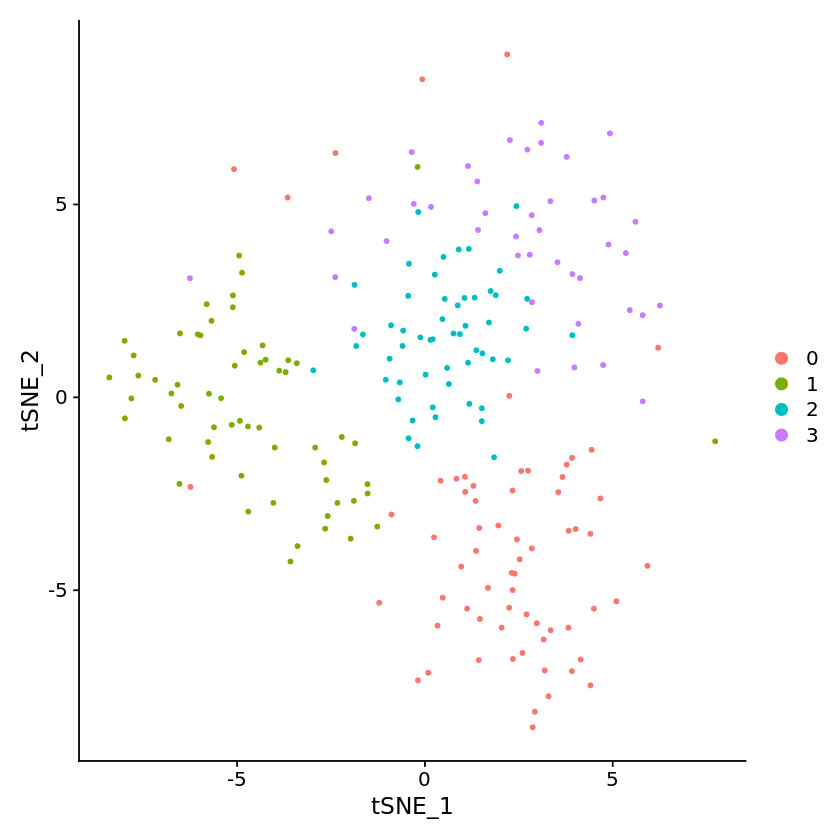

In [17]:
seurat1 <- FindNeighbors(seurat1, dims = 1:10)
seurat1 <- FindClusters(seurat1, resolution = 1.0)

Idents(seurat1)=seurat1@meta.data['seurat_clusters']
markers <- FindAllMarkers(seurat1, test.use="wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)
write.table(markers,sprintf('datasets/extract/%s.clusteringdeg.%s.tsv',save_name,'1_0'),sep='\t')

DimPlot(seurat1, reduction = "tsne")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 222
Number of edges: 6321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4494
Number of communities: 5
Elapsed time: 0 seconds


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



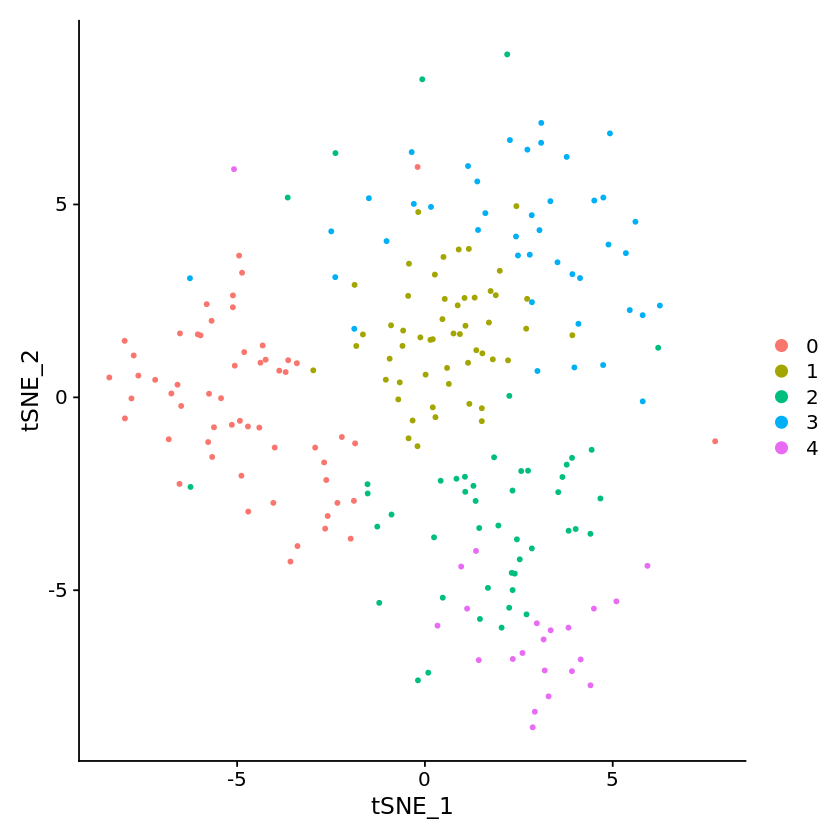

In [18]:
seurat1 <- FindNeighbors(seurat1, dims = 1:10)
seurat1 <- FindClusters(seurat1, resolution = 1.5)

Idents(seurat1)=seurat1@meta.data['seurat_clusters']
markers <- FindAllMarkers(seurat1, test.use="wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.25)
write.table(markers,sprintf('datasets/extract/%s.clusteringdeg.%s.tsv',save_name,'1_5'),sep='\t')

DimPlot(seurat1, reduction = "tsne")

In [6]:
save_name='Kohinbulk_filtered'
exp_data=readMM(sprintf("datasets/extract/%s.data.counts.mm",save_name))

In [9]:
exp_data_row=read.table(sprintf('datasets/extract/%s.data.row',save_name))$V1
exp_data_col=read.table(sprintf('datasets/extract/%s.data.col',save_name))$V1

In [13]:
rownames(exp_data)=exp_data_row
colnames(exp_data)=exp_data_col

In [21]:
metadatarow=read.table(sprintf('datasets/extract/%s.metadatarow.tsv',save_name),sep='\t')
metadatacol=read.table(sprintf('datasets/extract/%s.metadatacol.tsv',save_name),sep='\t')

In [26]:
seurat <- CreateSeuratObject(counts = exp_data, project = "scRNAseq", assay = "RNA",
                                     min.cells = 0, min.features = 0,
                                     meta.data = as.data.frame(metadatacol))

In [15]:
metadatarow=read.table('datasets/extract/{}_filtered.metadatarow.tsv'.format(dataset_name),sep='\t')
metadatacol=read.table('datasets/extract/{}_filtered.metadatacol.tsv'.format(dataset_name),sep='\t')

ERROR: Error in parse(text = x, srcfile = src): <text>:1:70: 예상하지 못한 기호(symbol)입니다.
1: metadatarow=read.table('datasets/extract/{}_filtered.metadatarow.tsv'.format
                                                                         ^


In [ ]:
seurat <- CreateSeuratObject(counts = exp_data, project = "scRNAseq", assay = "RNA",
                                     min.cells = 0, min.features = 0,
                                     meta.data = as.data.frame(colData(sce)))

In [12]:
length(exp_data_row)

[1] 14694

In [11]:
dim(exp_data)

[1] 14694   446

In [10]:
rownames(exp_data)

NULL

In [ ]:
save_sce(sce_full_Kohinbulk_expfiltered,)

In [ ]:
save_hvg_seurat <-function(sce,save_name,method){
    seurat <- CreateSeuratObject(counts = counts(sce), project = "scRNAseq", assay = "RNA",
                                         min.cells = 0, min.features = 0,
                                         meta.data = as.data.frame(colData(sce)))
    #seurat <- ScaleData(seurat, vars.to.regress = "nUMI", display.progress = FALSE)
    seurat <- NormalizeData(seurat)
    seurat <- FindVariableFeatures(seurat, selection.method = method, nfeatures = length(rownames(seurat@assays$RNA)))
    vf <- VariableFeatures(seurat)  
    write.table(vf,file=sprintf('datasets/extract/%s.%s.tsv',save_name,method),sep='\t',row.names=FALSE, col.names=TRUE)       
}

In [ ]:
    save_data=Matrix(as.matrix(assay(sce,'counts')),sparse=TRUE)
    
    writeMM(save_data,sprintf("datasets/extract/%s.data.counts.mm",save_name))
    write.table(as.matrix(rownames(save_data)),sprintf('datasets/extract/%s.data.row',save_name),row.names=FALSE, col.names=FALSE)
    write.table(as.matrix(colnames(save_data)),sprintf('datasets/extract/%s.data.col',save_name),row.names=FALSE, col.names=FALSE)
    